Enable auto-reloading of external modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Import dependencies

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sys import getsizeof

from utils.data_loader import *
from utils.null_handler import *
from utils.EDA_utils import *

import warnings
warnings.filterwarnings('ignore')

SEED=10
plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100
# figure size in inches
rcParams['figure.figsize'] = 8, 8
sns.set_style("darkgrid")

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment
    # clear_output()

### Loading ACSEmployment data

In [4]:
config = {
    'state': ["CA"],
    'year': '2016',
    'task': ACSEmployment
}

In [5]:
X_data_load, y_data = ACSDataLoader(task=config['task'], state=config['state'], year=config['year'])

In [6]:
# If the task is ACSEmployment, we can optimize the file size
print(f'Original: {int(getsizeof(X_data_load) / 1024**2)} mb')
print(f'Optimized: {int(getsizeof(optimize_ACSEmployment(X_data_load)) / 1024**2)} mb')

X_data = optimize_ACSEmployment(X_data_load)

Original: 45 mb
Optimized: 23 mb


#### Checking if there are nulls in the dataset

In [7]:
X_data.isnull().sum()

AGEP             0
SCHL         11466
MAR              0
RELP             0
DIS              0
ESP         300716
CIT              0
MIG           3702
MIL          74731
ANC              0
NATIVITY         0
DEAR             0
DEYE             0
DREM         19605
SEX              0
RAC1P            0
dtype: int64

### Preprocessing: Handling nulls

In [8]:
missing = ['SCHL', 'ESP', 'MIG', 'MIL', 'DREM']

In [9]:
handle_nulls = {
    'special': ['SCHL','MIG', 'MIL', 'DREM', 'ESP'],
}

In [10]:
# Checking dataset shape before handling nulls
X_data.shape, X_data.columns

((376035, 16),
 Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
        'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P'],
       dtype='object'))

In [11]:
for how_to in handle_nulls.keys():
    X_data = handle_df_nulls(X_data, how_to, handle_nulls[how_to])

Impute values:  {'SCHL': 0, 'MIG': 0, 'MIL': 0, 'DREM': 0, 'ESP': 0}


In [12]:
#Checking dataset shape after handling nulls
X_data.shape, X_data.columns

((376035, 16),
 Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
        'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P'],
       dtype='object'))

#### Rechecking if there are nulls -- if the null_handler has run correctly, there should not be

In [13]:
X_data.isnull().sum()

AGEP        0
SCHL        0
MAR         0
RELP        0
DIS         0
ESP         0
CIT         0
MIG         0
MIL         0
ANC         0
NATIVITY    0
DEAR        0
DEYE        0
DREM        0
SEX         0
RAC1P       0
dtype: int64

### Analysis for Different Null Scenarios

#### "Optional" Type of Nulls [MAR column]

**Scenario:** MAR, when MAR is in (2,3,4)

In [14]:
special_values = [2, 3, 4]
condition_col='MAR'
target_col='MAR'
fraction=0.9
corrupted_data_MAR = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for MAR column: 47040
Count of all records in MAR column: 376035
Count of records in MAR column in the defined condition: 52267




<Figure size 800x800 with 0 Axes>

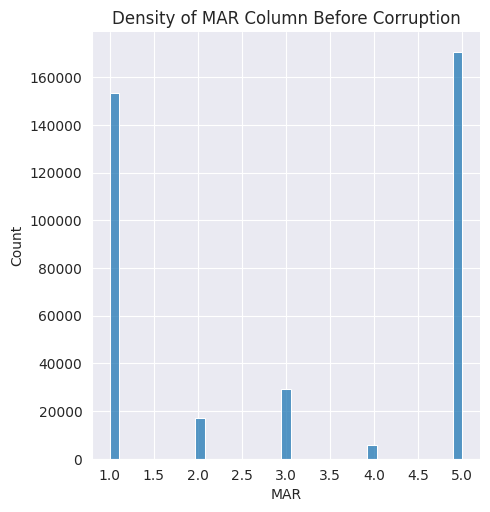

<Figure size 800x800 with 0 Axes>

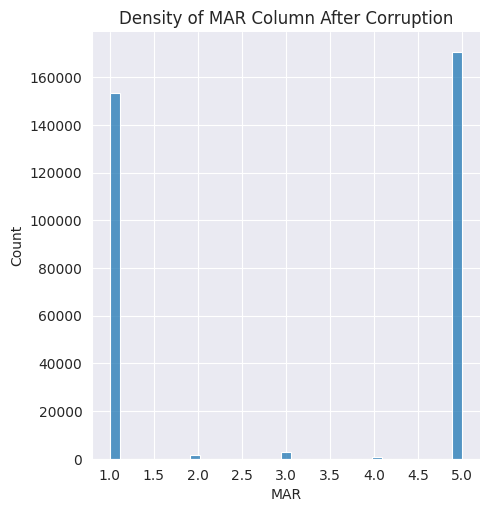

Plot AGEP column Split by Race [Before Corruption]


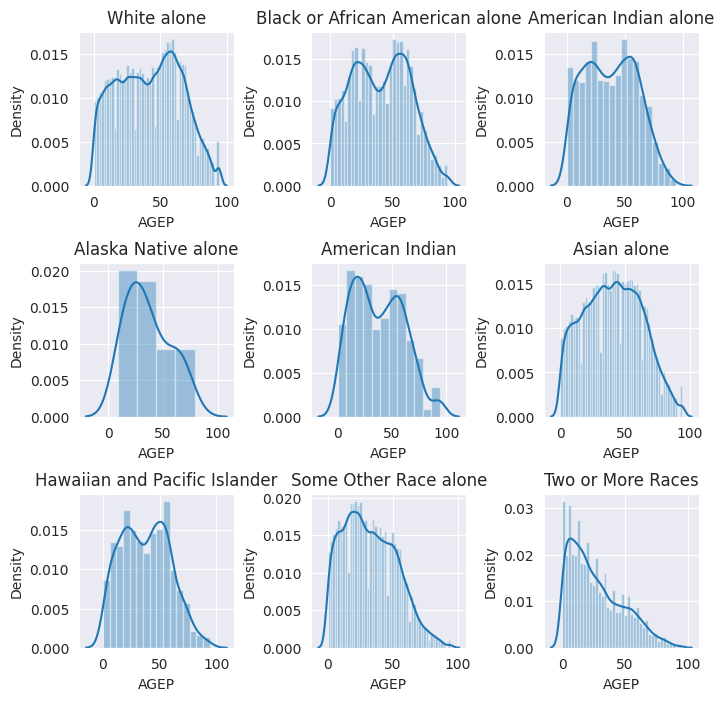




Plot AGEP column Split by Race [After Corruption]


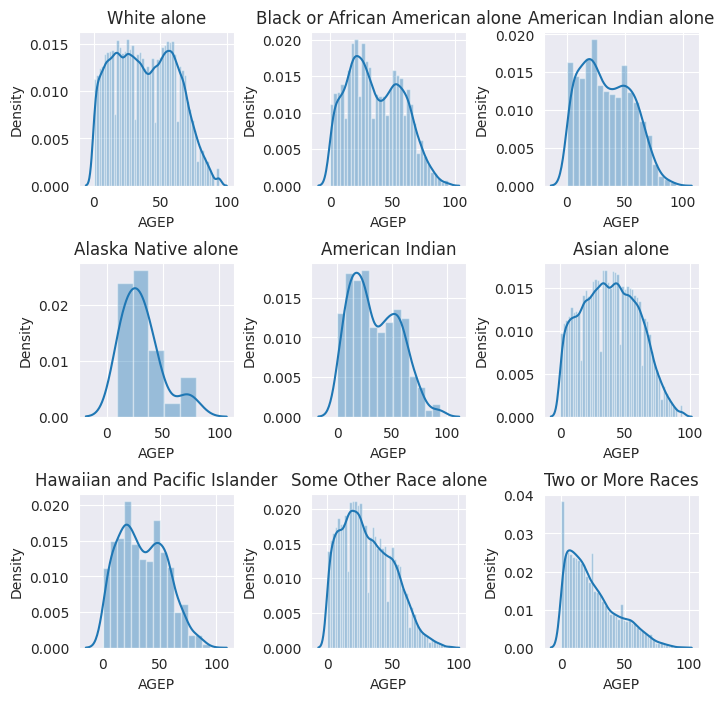

In [15]:
null_scenario_analysis(X_data, corrupted_data_MAR, target_col, condition_col, special_values)

### "Not Applicable" Type of Nulls

#### MIL Column

In [16]:
special_values = [i for i in range(0, 17)]
condition_col='AGEP'
target_col='MIL'
fraction=0.9
corrupted_data_MIL = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for MIL column: 67257
Count of all records in MIL column: 376035
Count of records in AGEP column in the defined condition: 74731




<Figure size 800x800 with 0 Axes>

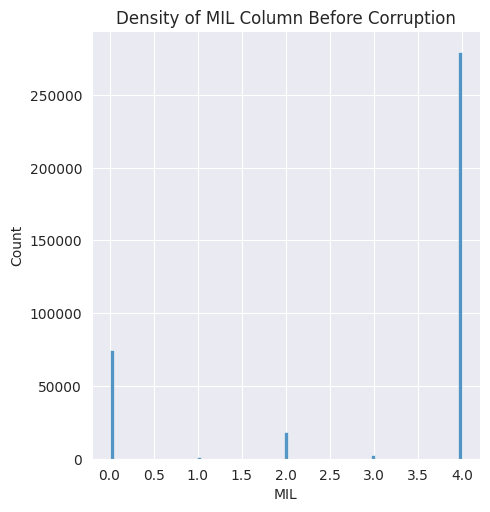

<Figure size 800x800 with 0 Axes>

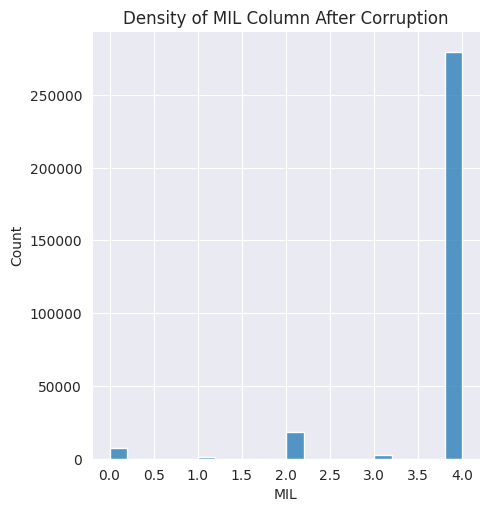

Plot AGEP column Split by Race [Before Corruption]


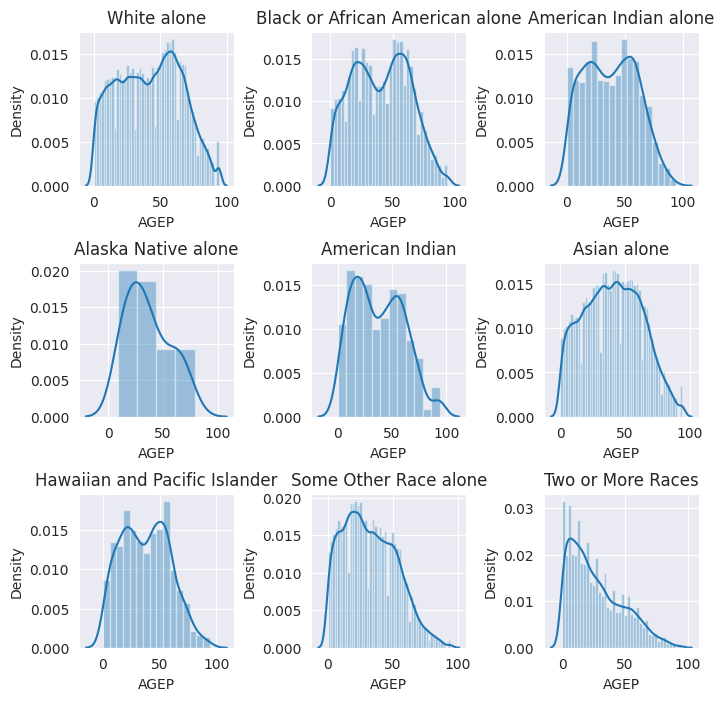




Plot AGEP column Split by Race [After Corruption]


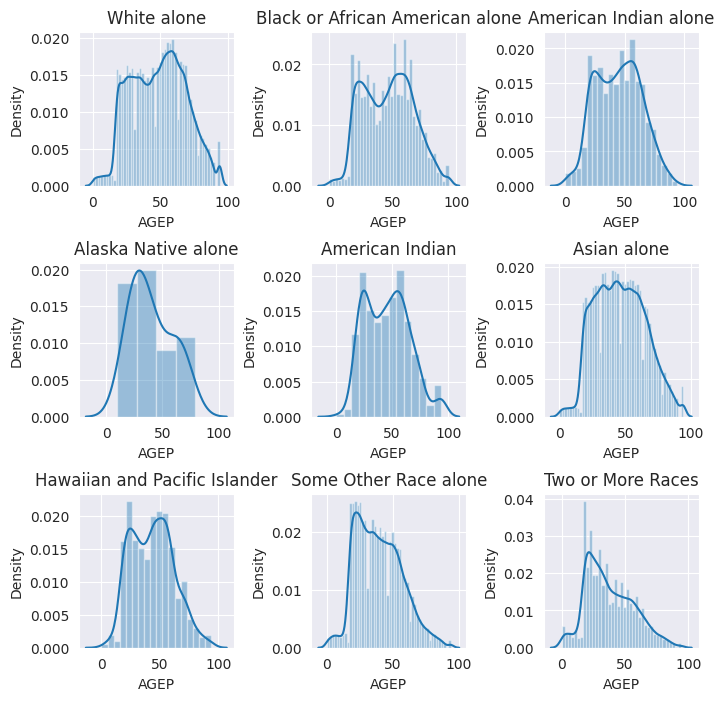

In [17]:
null_scenario_analysis(X_data, corrupted_data_MIL, target_col, condition_col, special_values)

#### SCHL Column

**Scenario:** SCHL is null, when AGEP less than 3 years old

In [18]:
special_values = [i for i in range(0, 17)]
condition_col='AGEP'
target_col='SCHL'
fraction=0.9
corrupted_data_SCHL = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for SCHL column: 67257
Count of all records in SCHL column: 376035
Count of records in AGEP column in the defined condition: 74731




<Figure size 800x800 with 0 Axes>

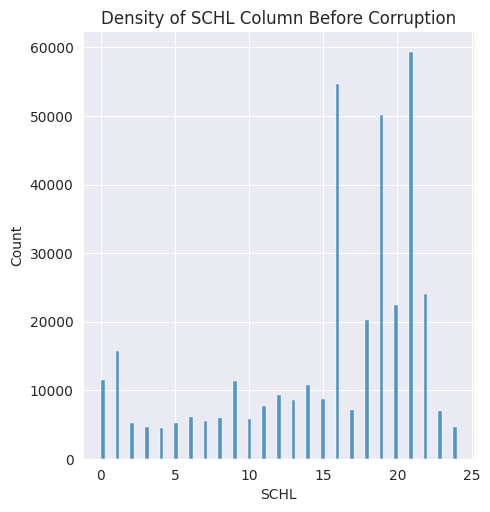

<Figure size 800x800 with 0 Axes>

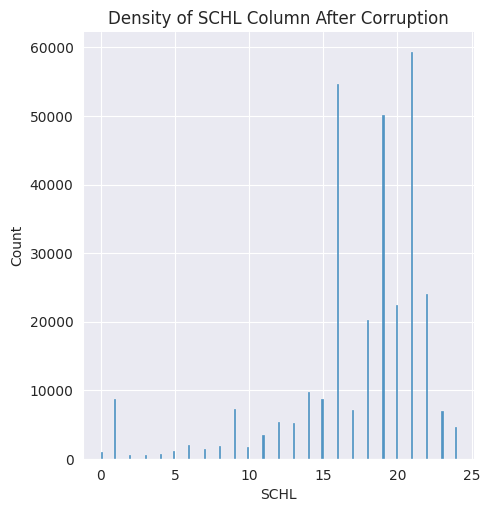

Plot AGEP column Split by Race [Before Corruption]


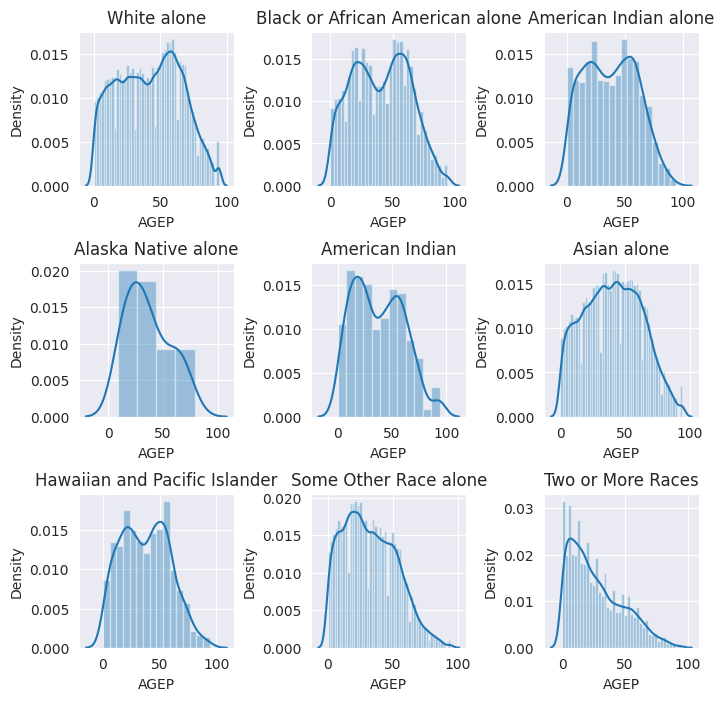




Plot AGEP column Split by Race [After Corruption]


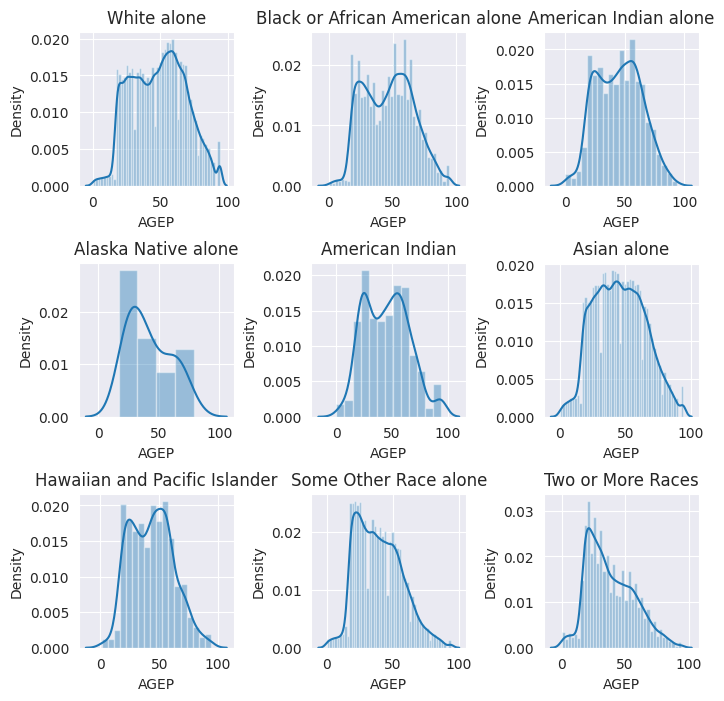

In [19]:
null_scenario_analysis(X_data, corrupted_data_SCHL, target_col, condition_col, special_values)

#### ESP Column

**Scenario:** ESP is null, when you do not own child of householder, and not child in subfamily

In [20]:
special_values = [0]
condition_col='ESP'
target_col='ESP'
fraction=0.9
corrupted_data_ESP = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for ESP column: 270644
Count of all records in ESP column: 376035
Count of records in ESP column in the defined condition: 300716




<Figure size 800x800 with 0 Axes>

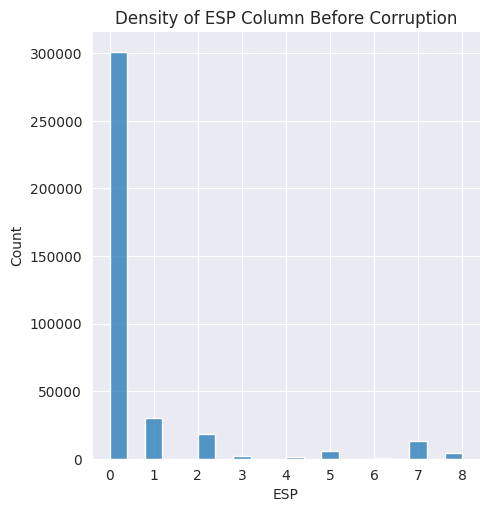

<Figure size 800x800 with 0 Axes>

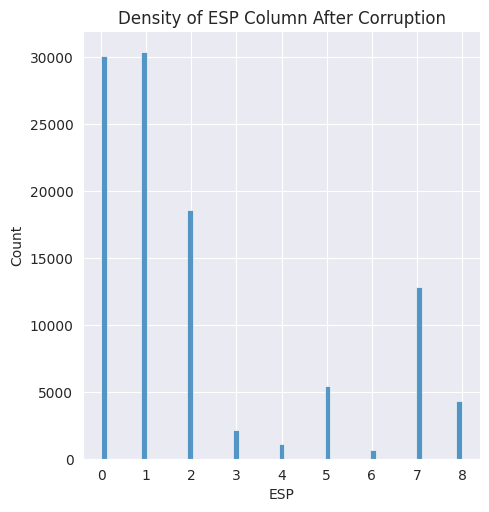

Plot AGEP column Split by Race [Before Corruption]


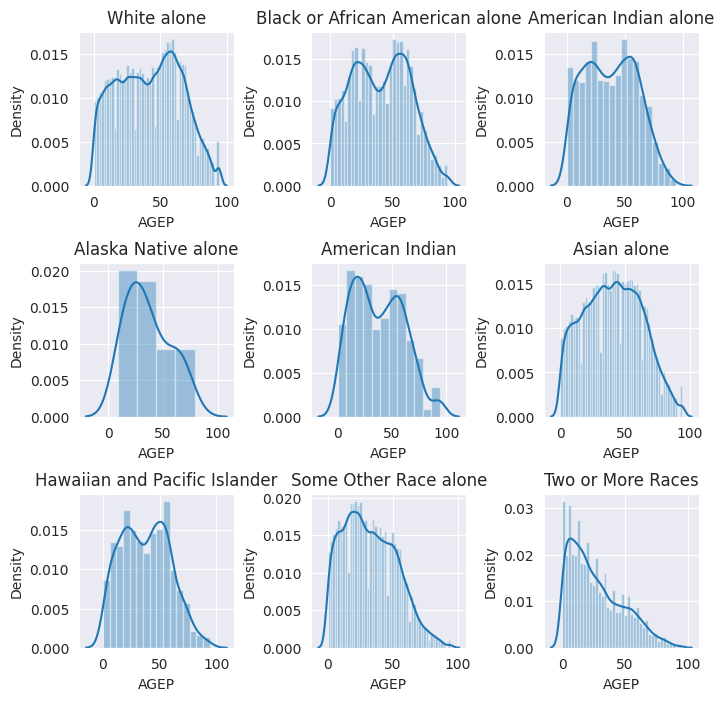




Plot AGEP column Split by Race [After Corruption]


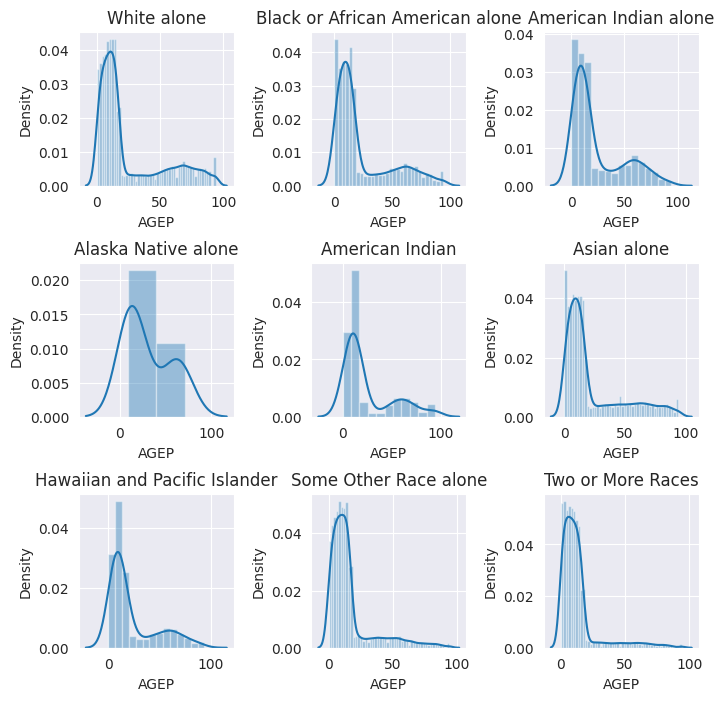

In [21]:
null_scenario_analysis(X_data, corrupted_data_ESP, target_col, condition_col, special_values)

#### MIG Column

**Scenario:** MIG, when AGEP is less than 1 year old

In [22]:
special_values = [0, 1]
condition_col='AGEP'
target_col='MIG'
fraction=0.9
corrupted_data_MIG = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for MIG column: 6776
Count of all records in MIG column: 376035
Count of records in AGEP column in the defined condition: 7529




<Figure size 800x800 with 0 Axes>

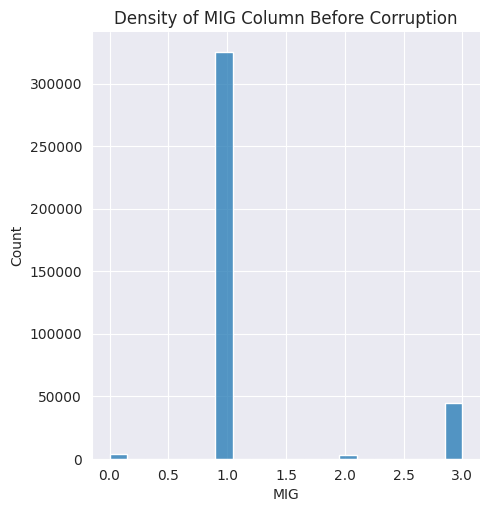

<Figure size 800x800 with 0 Axes>

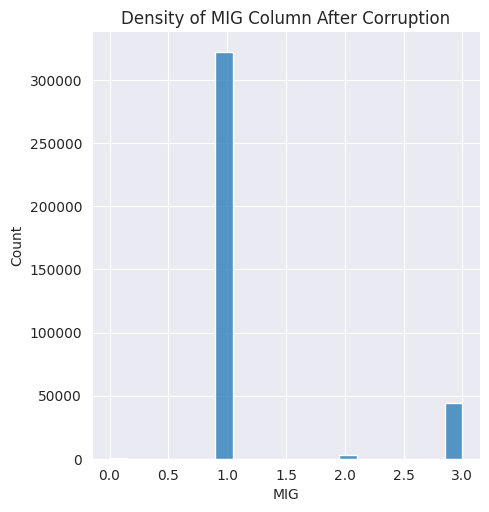

Plot AGEP column Split by Race [Before Corruption]


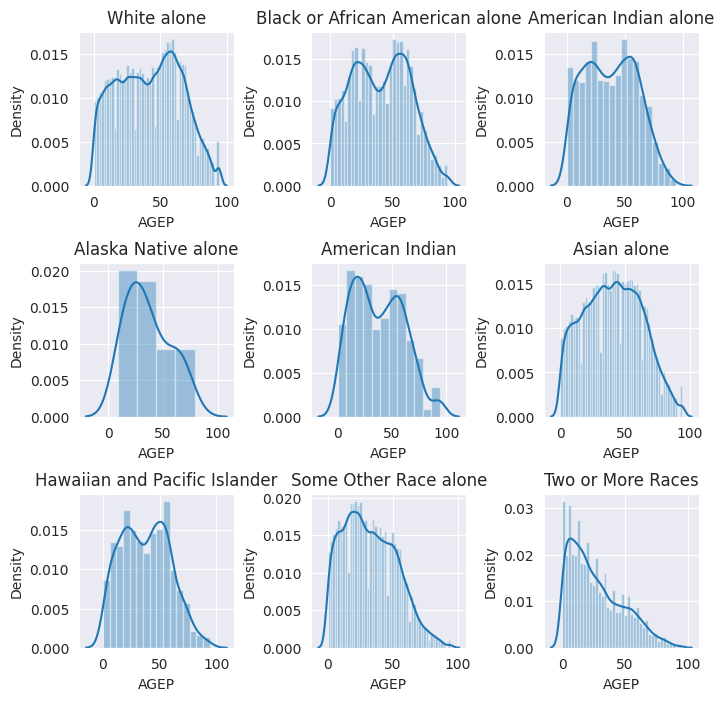




Plot AGEP column Split by Race [After Corruption]


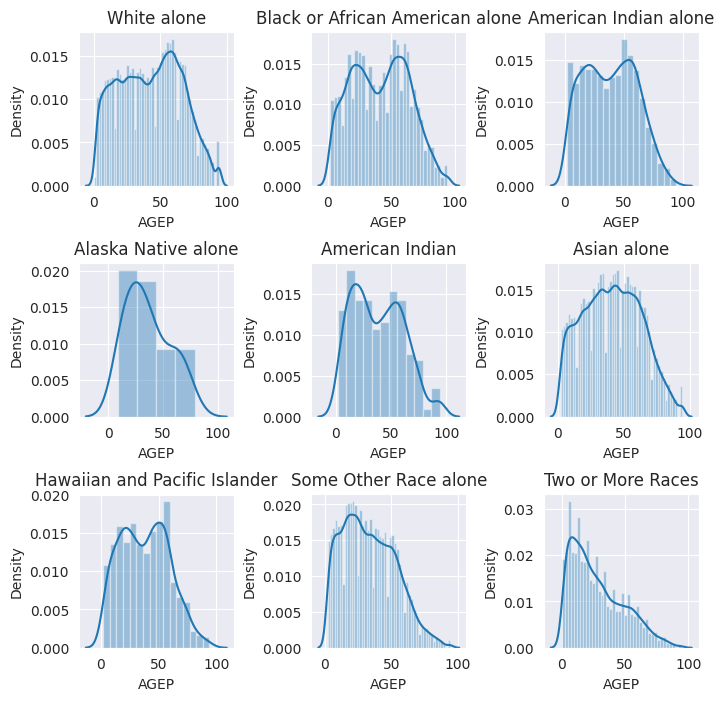

In [23]:
null_scenario_analysis(X_data, corrupted_data_MIG, target_col, condition_col, special_values)

#### DREM Column

**Scenario:** DREM is null, when AGEP is less than 5 years old

In [24]:
special_values = [i for i in range(0, 5)]
condition_col='AGEP'
target_col='DREM'
fraction=0.9
corrupted_data_DREM_not_applic = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for DREM column: 17644
Count of all records in DREM column: 376035
Count of records in AGEP column in the defined condition: 19605




<Figure size 800x800 with 0 Axes>

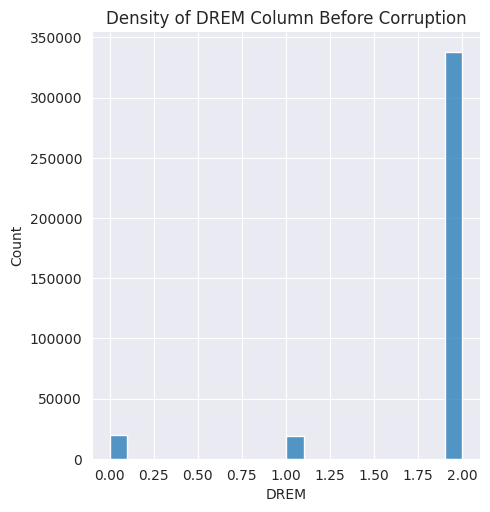

<Figure size 800x800 with 0 Axes>

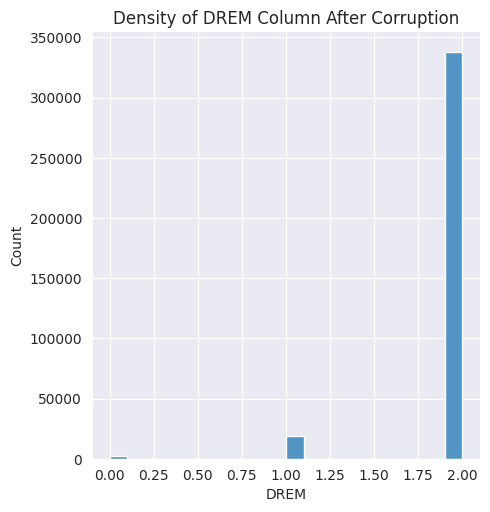

Plot AGEP column Split by Race [Before Corruption]


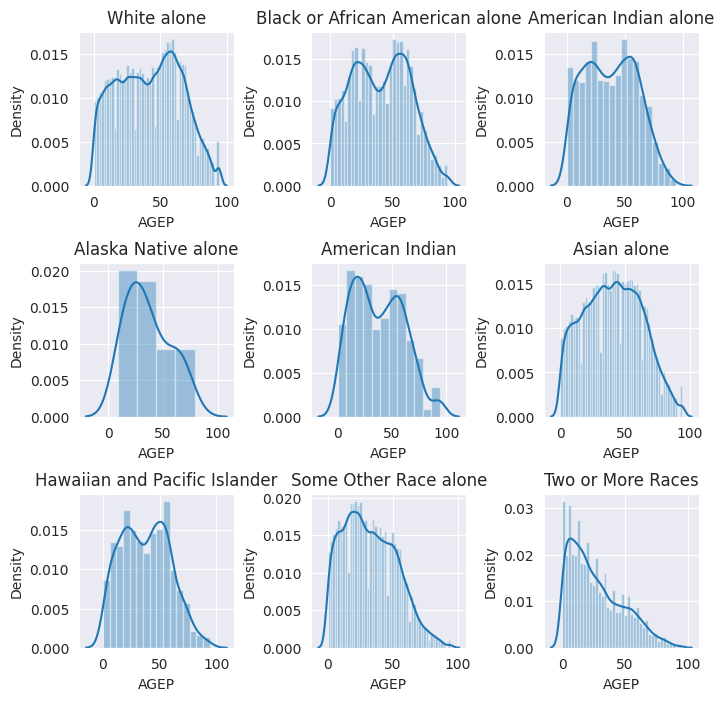




Plot AGEP column Split by Race [After Corruption]


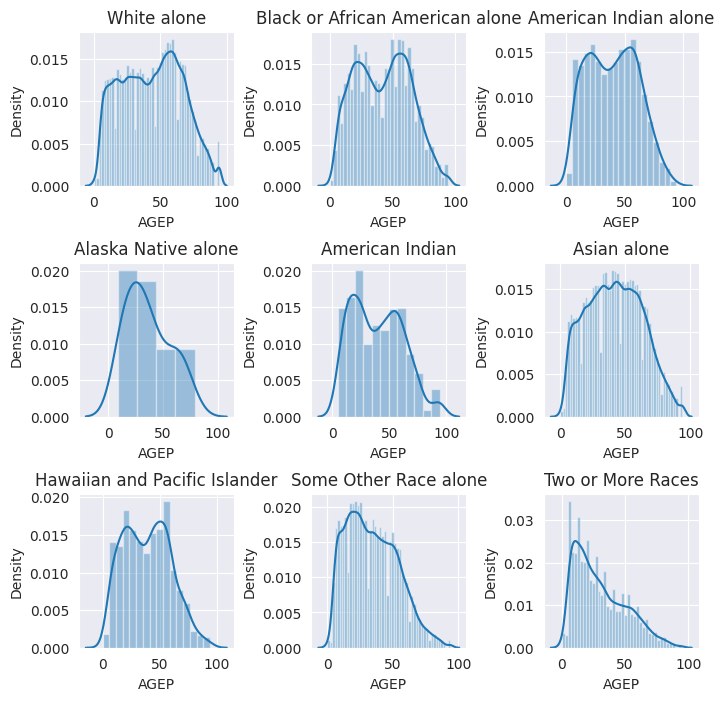

In [25]:
null_scenario_analysis(X_data, corrupted_data_DREM_not_applic, target_col, condition_col, special_values)

## Unknown

### AGEP, when RELP is in (8,10,11,12,15)

In [26]:
special_values = (8, 10, 11, 12, 15)
condition_col = 'RELP'
target_col = 'AGEP'
fraction = .9
corrupted_data_AGEP = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for AGEP column: 20599
Count of all records in AGEP column: 376035
Count of records in RELP column in the defined condition: 22888




<Figure size 800x800 with 0 Axes>

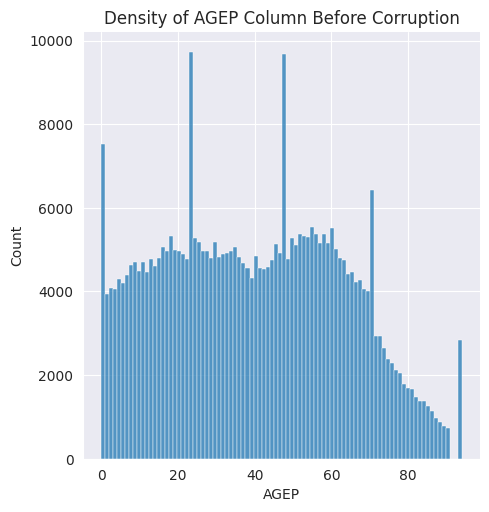

<Figure size 800x800 with 0 Axes>

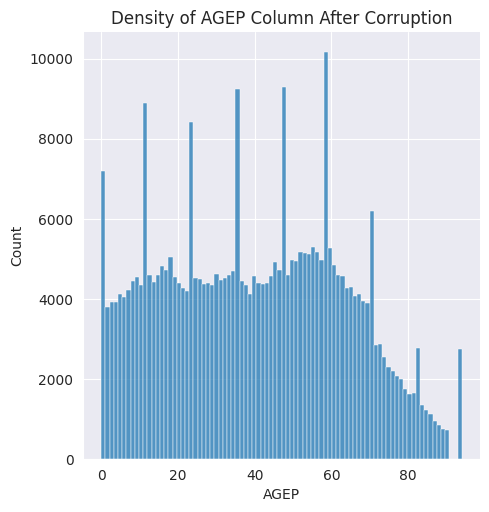

In [27]:
null_scenario_analysis(X_data, corrupted_data_AGEP, target_col, condition_col, special_values, print_plots_grouped_by_race=False)

### NATIVITY. When RELP is in (11,12,15)

In [28]:
special_values = (11, 12, 15)
condition_col = 'RELP'
target_col = 'NATIVITY'
fraction = .9
corrupted_data_NATIVITY = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for NATIVITY column: 12480
Count of all records in NATIVITY column: 376035
Count of records in RELP column in the defined condition: 13867




<Figure size 800x800 with 0 Axes>

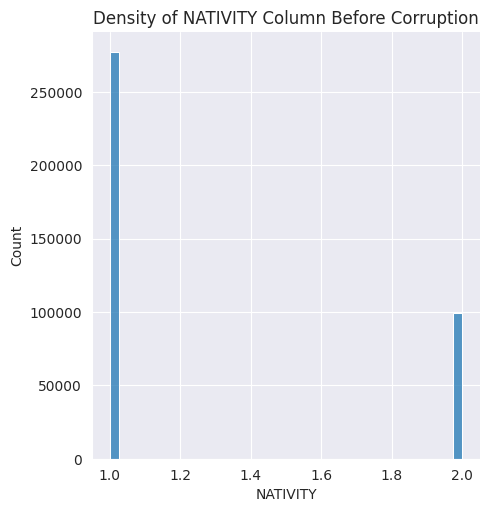

<Figure size 800x800 with 0 Axes>

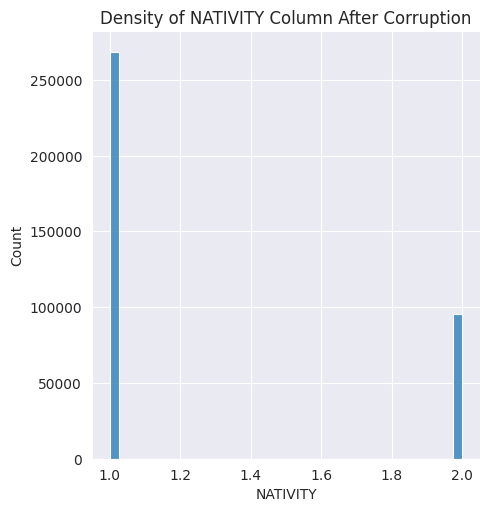

In [29]:
null_scenario_analysis(X_data, corrupted_data_NATIVITY, target_col, condition_col, special_values, print_plots_grouped_by_race=False)

## Avoided

In [30]:
condition_col = 'DIS'
target_col = 'DIS'
special_values = [True]
fraction = .9
corrupted_data_DIS = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for DIS column: 43038
Count of all records in DIS column: 376035
Count of records in DIS column in the defined condition: 47820




<Figure size 800x800 with 0 Axes>

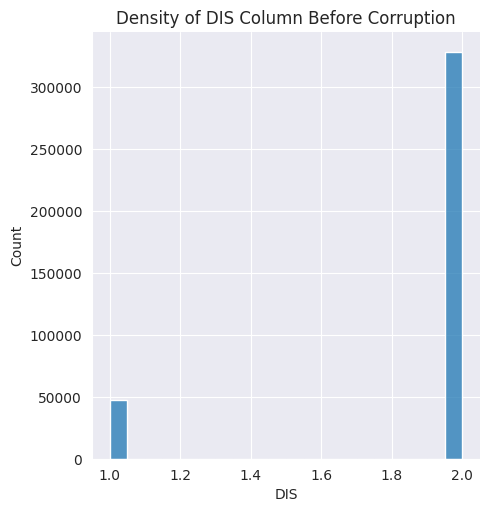

<Figure size 800x800 with 0 Axes>

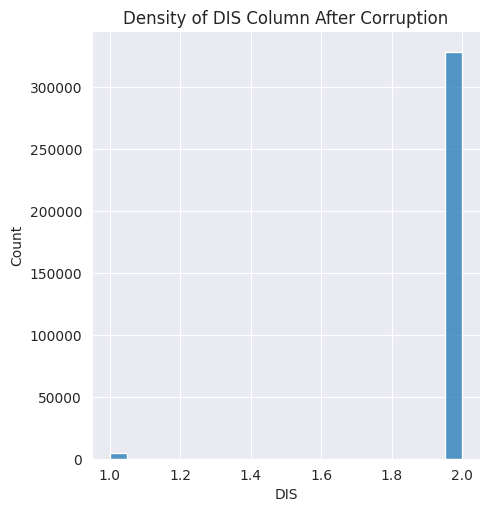

In [31]:
null_scenario_analysis(X_data, corrupted_data_DIS, target_col, condition_col, special_values, print_plots_grouped_by_race=False)

In [32]:
condition_col = 'DEAR'
target_col = 'DEAR'
special_values = [True]
fraction = .9
corrupted_data_DEAR = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for DEAR column: 12060
Count of all records in DEAR column: 376035
Count of records in DEAR column in the defined condition: 13400




<Figure size 800x800 with 0 Axes>

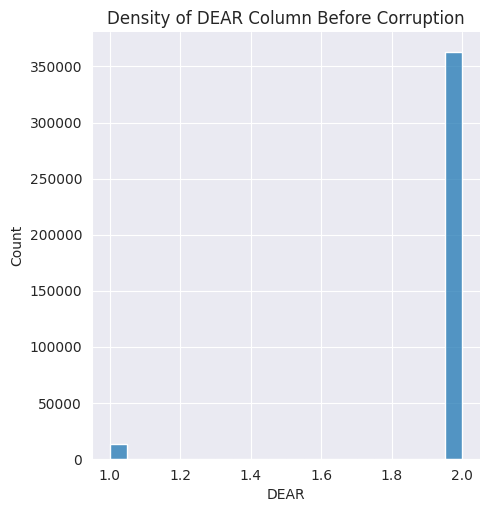

<Figure size 800x800 with 0 Axes>

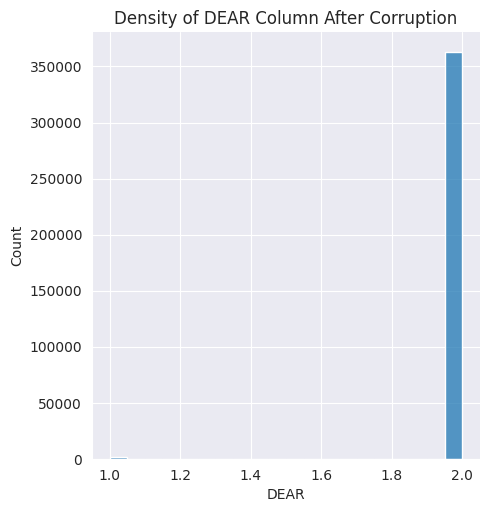

In [33]:
null_scenario_analysis(X_data, corrupted_data_DEAR, target_col, condition_col, special_values, print_plots_grouped_by_race=False)

In [34]:
condition_col = 'DEYE'
target_col = 'DEYE'
special_values = [True]
fraction = .9
corrupted_data_DEYE = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for DEYE column: 7896
Count of all records in DEYE column: 376035
Count of records in DEYE column in the defined condition: 8774




<Figure size 800x800 with 0 Axes>

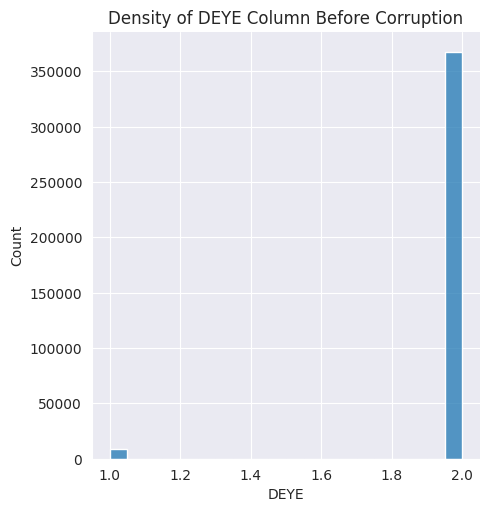

<Figure size 800x800 with 0 Axes>

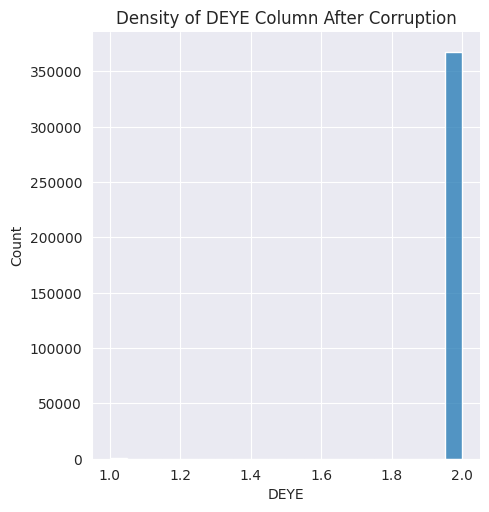

In [35]:
null_scenario_analysis(X_data, corrupted_data_DEYE, target_col, condition_col, special_values, print_plots_grouped_by_race=False)

In [36]:
condition_col = 'DREM'
target_col = 'DREM'
special_values = [True]
fraction = .9
corrupted_data_DREM_avoided = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for DREM column: 16881
Count of all records in DREM column: 376035
Count of records in DREM column in the defined condition: 18757




<Figure size 800x800 with 0 Axes>

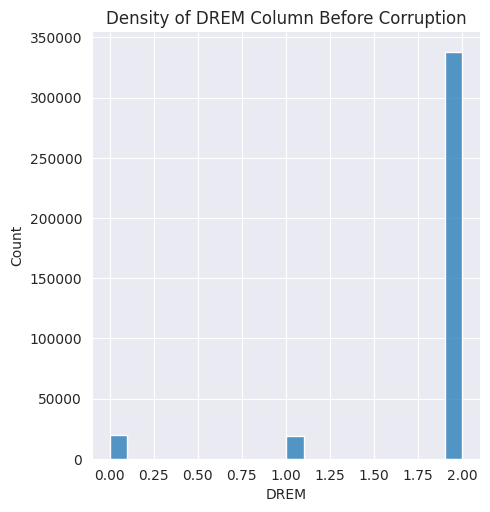

<Figure size 800x800 with 0 Axes>

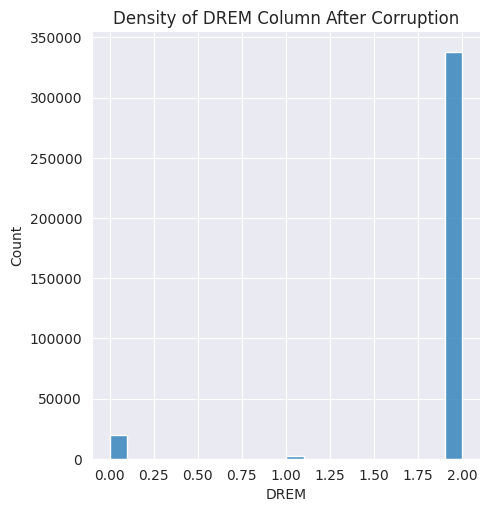

In [37]:
null_scenario_analysis(X_data, corrupted_data_DREM_avoided, target_col, condition_col, special_values, print_plots_grouped_by_race=False)

## Special

SEX, when sex is male or ratio of male and female can be 60:40, assuming person is non-binary, impute as NULL (special)

In [38]:
special_values = [1]
condition_col = 'SEX'
target_col = 'SEX'
fraction = .11
corrupted_data_SEX = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

RAC1P, when RAC1P is 9, assuming people are biracial, impute as NULL (special)

In [39]:
special_values = [9]
condition_col = 'RAC1P'
target_col = 'RAC1P'
fraction = .9
corrupted_data_RAC1P = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

## Impute Nulls

In [40]:
def impute_with_all_techniques(corrupted_data, target_column, column_type):
    if column_type == "categorical":
        # TODO: add drop-... techniques

        # TODO: standartize axis scale
        how_to_list = ["impute-by-mode", "impute-by-mode-trimmed"]
    elif column_type == "numerical":
        how_to_list = ["impute-by-mean", "impute-by-mean-trimmed", "impute-by-median", "impute-by-median-trimmed"]
    else:
        raise ValueError("Incorrect input column_type. It must be in ('categorical', 'numerical')")

    imputed_data_dict = dict()
    for how_to in how_to_list:
        print("\n" * 4, "#" * 15, f" Impute {target_column} column with {how_to} technique ", "#" * 15)
        imputed_data = handle_df_nulls(corrupted_data, how_to, column_names=[target_column])
        imputed_data_dict[how_to] = imputed_data
        imputed_nulls_analysis(imputed_data, corrupted_data, target_col=target_column)

    return imputed_data_dict

### "Optional" Type of Nulls [MAR column]





 ###############  Impute MAR column with impute-by-mode technique  ###############
Impute values:  {'MAR': 5.0}
Number of nulls in MAR column in the corrupted dataframe:  47040
Number of nulls in MAR column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

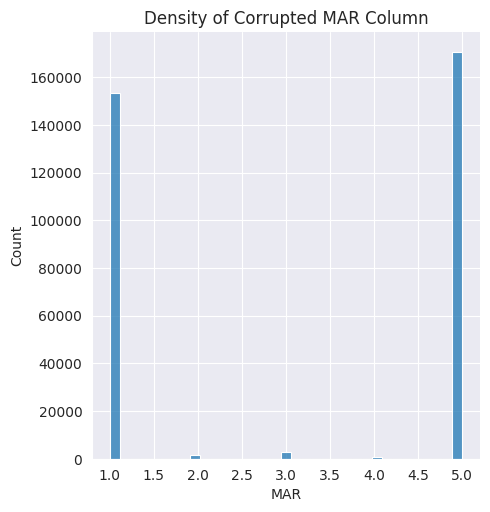

<Figure size 800x800 with 0 Axes>

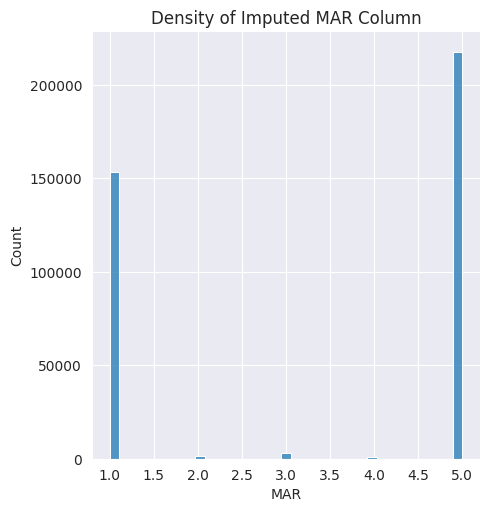





 ###############  Impute MAR column with impute-by-mode-trimmed technique  ###############
Impute values:  {'MAR': 5.0}
Number of nulls in MAR column in the corrupted dataframe:  47040
Number of nulls in MAR column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

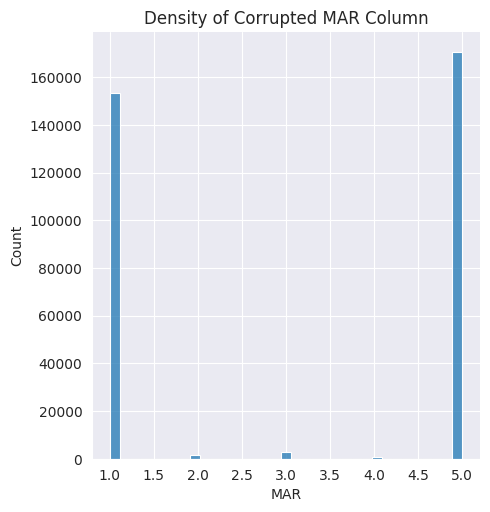

<Figure size 800x800 with 0 Axes>

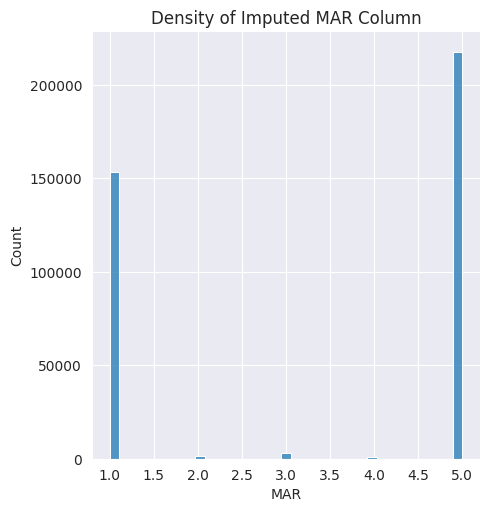

In [41]:
imputed_data_dict_MAR = impute_with_all_techniques(corrupted_data_MAR, target_column="MAR", column_type="categorical")

### "Not Applicable" Type of Nulls

#### MIL Column





 ###############  Impute MIL column with impute-by-mode technique  ###############
Impute values:  {'MIL': 4.0}
Number of nulls in MIL column in the corrupted dataframe:  67257
Number of nulls in MIL column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

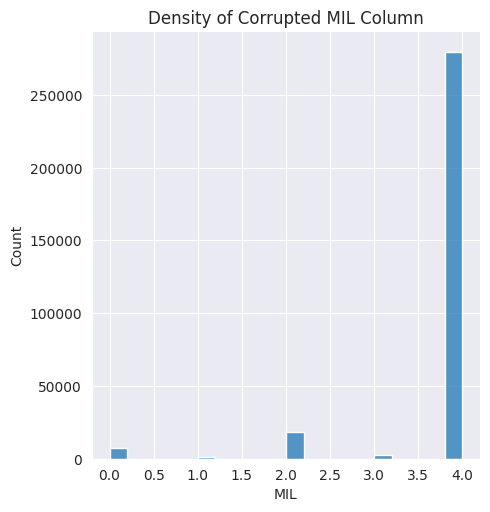

<Figure size 800x800 with 0 Axes>

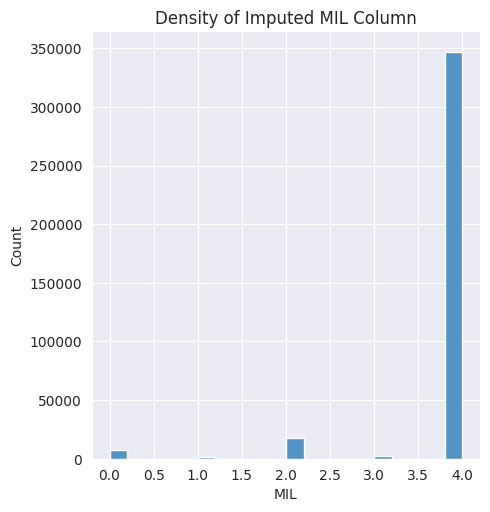





 ###############  Impute MIL column with impute-by-mode-trimmed technique  ###############
Impute values:  {'MIL': 4.0}
Number of nulls in MIL column in the corrupted dataframe:  67257
Number of nulls in MIL column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

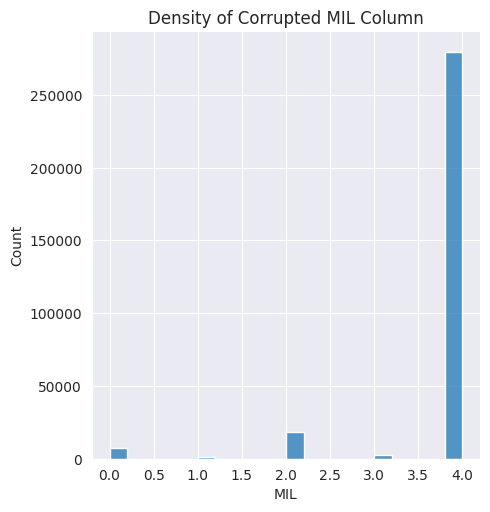

<Figure size 800x800 with 0 Axes>

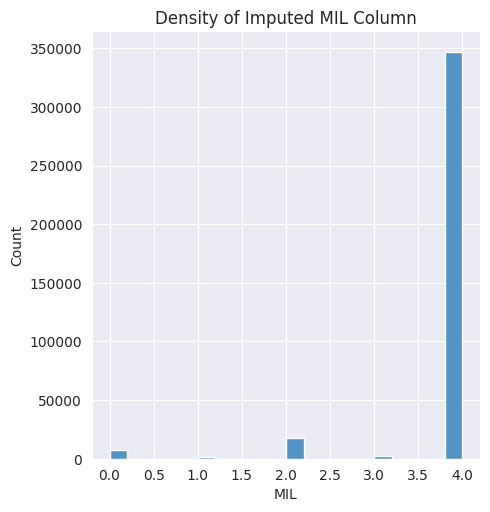

In [42]:
imputed_data_dict_MIL = impute_with_all_techniques(corrupted_data_MIL, target_column="MIL", column_type="categorical")

#### SCHL Column





 ###############  Impute SCHL column with impute-by-mean technique  ###############
Impute values:  {'SCHL': 17.429729449636955}
Number of nulls in SCHL column in the corrupted dataframe:  67257
Number of nulls in SCHL column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

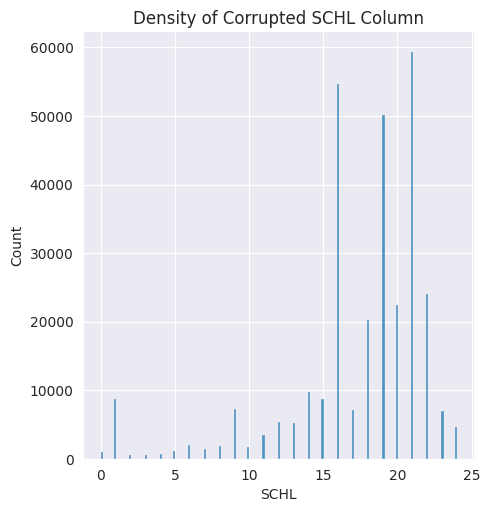

<Figure size 800x800 with 0 Axes>

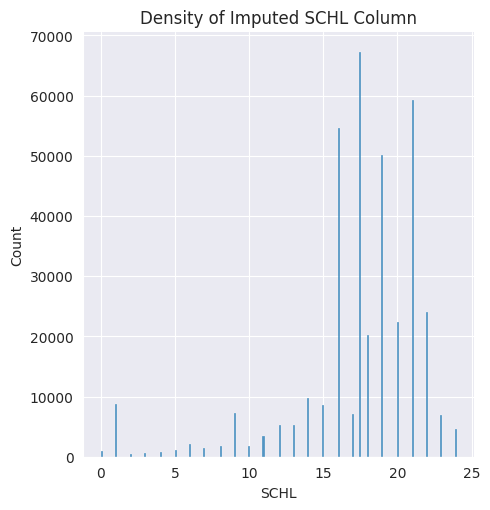





 ###############  Impute SCHL column with impute-by-mean-trimmed technique  ###############
Impute values:  {'SCHL': 18.226896981669796}
Number of nulls in SCHL column in the corrupted dataframe:  67257
Number of nulls in SCHL column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

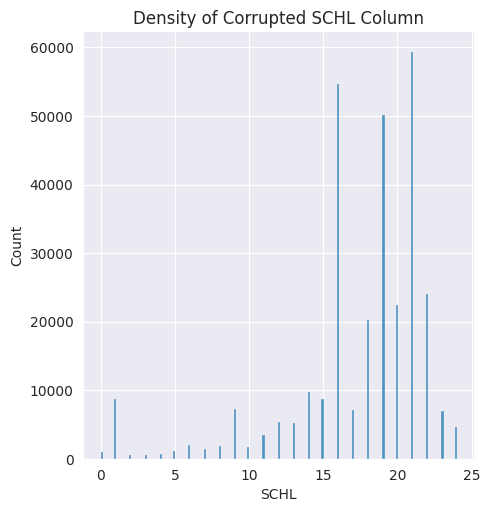

<Figure size 800x800 with 0 Axes>

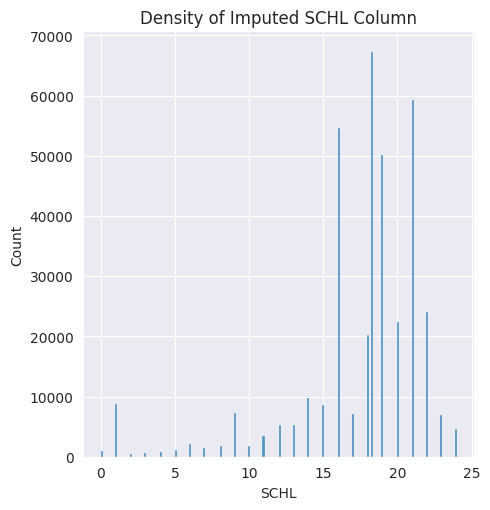





 ###############  Impute SCHL column with impute-by-median technique  ###############
Impute values:  {'SCHL': 19.0}
Number of nulls in SCHL column in the corrupted dataframe:  67257
Number of nulls in SCHL column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

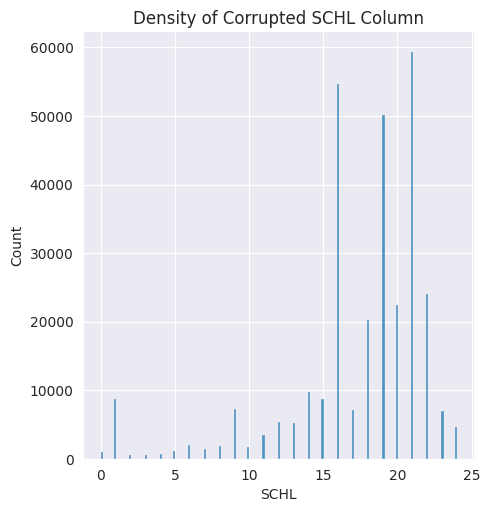

<Figure size 800x800 with 0 Axes>

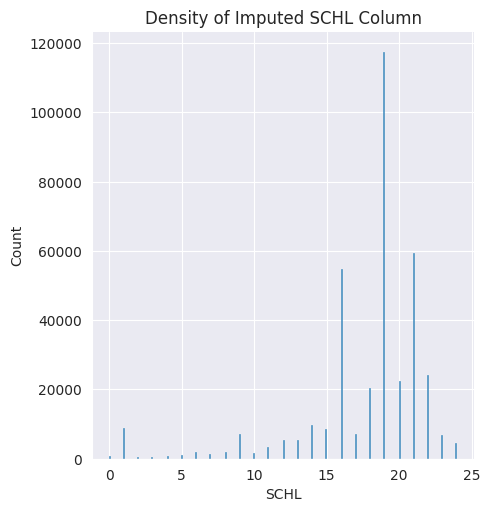





 ###############  Impute SCHL column with impute-by-median-trimmed technique  ###############
Impute values:  {'SCHL': 19.0}
Number of nulls in SCHL column in the corrupted dataframe:  67257
Number of nulls in SCHL column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

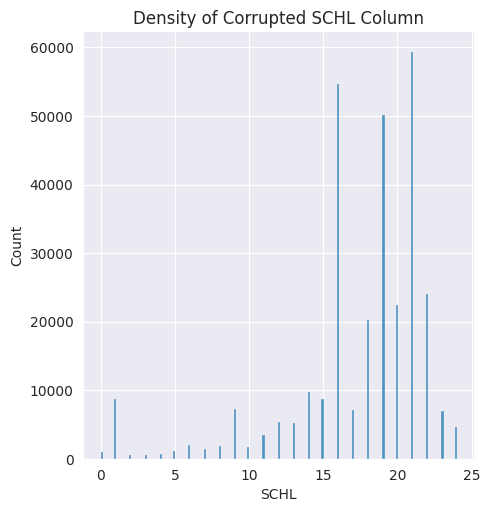

<Figure size 800x800 with 0 Axes>

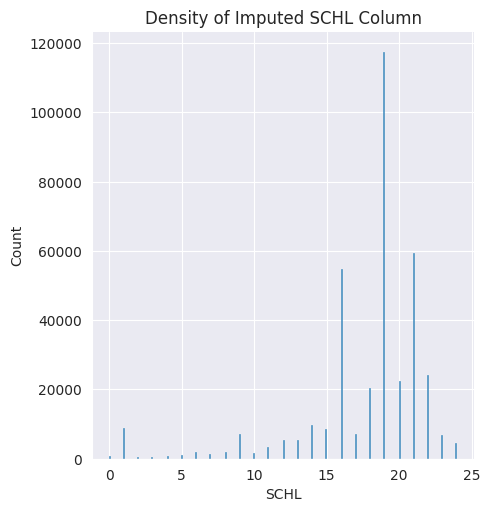

In [43]:
# TODO: round mean
imputed_data_dict_SCHL = impute_with_all_techniques(corrupted_data_SCHL, target_column="SCHL", column_type="numerical")

#### ESP Column





 ###############  Impute ESP column with impute-by-mode technique  ###############
Impute values:  {'ESP': 1.0}
Number of nulls in ESP column in the corrupted dataframe:  270644
Number of nulls in ESP column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

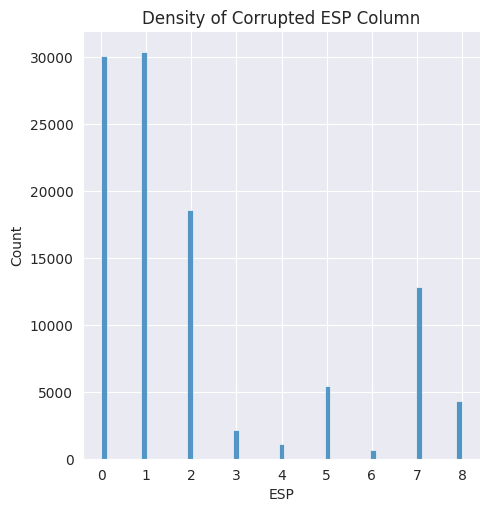

<Figure size 800x800 with 0 Axes>

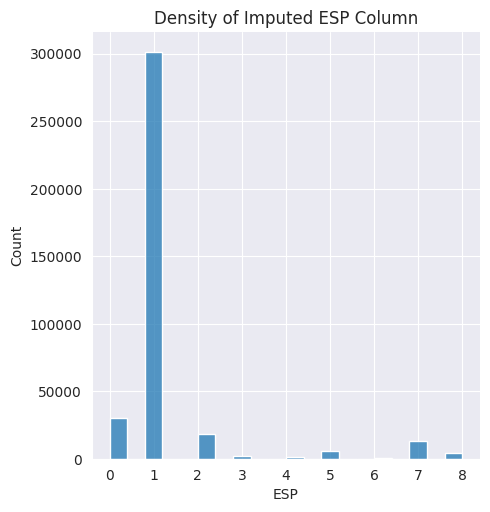





 ###############  Impute ESP column with impute-by-mode-trimmed technique  ###############
Impute values:  {'ESP': 1.0}
Number of nulls in ESP column in the corrupted dataframe:  270644
Number of nulls in ESP column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

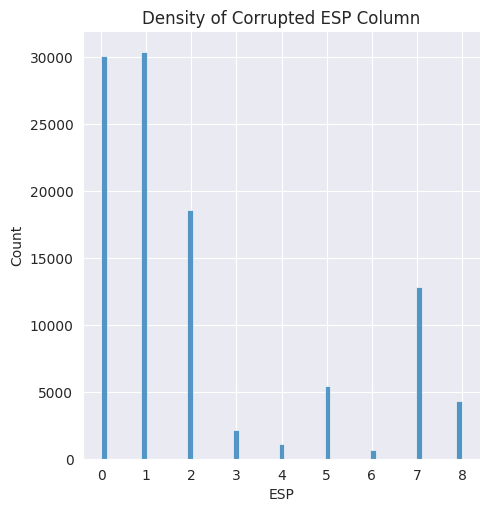

<Figure size 800x800 with 0 Axes>

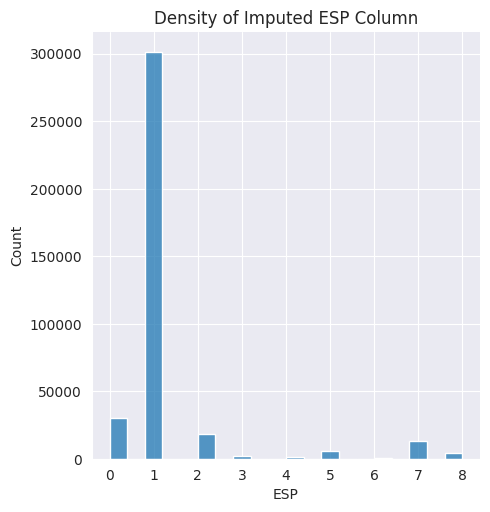

In [44]:
imputed_data_dict_ESP = impute_with_all_techniques(corrupted_data_ESP, target_column="ESP", column_type="categorical")

#### MIG Column





 ###############  Impute MIG column with impute-by-mode technique  ###############
Impute values:  {'MIG': 1.0}
Number of nulls in MIG column in the corrupted dataframe:  6776
Number of nulls in MIG column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

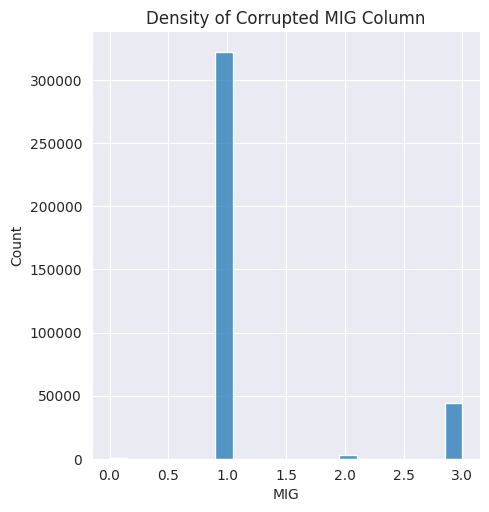

<Figure size 800x800 with 0 Axes>

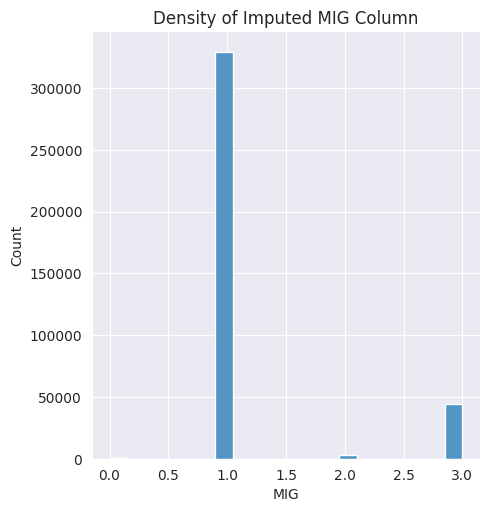





 ###############  Impute MIG column with impute-by-mode-trimmed technique  ###############
Impute values:  {'MIG': 1.0}
Number of nulls in MIG column in the corrupted dataframe:  6776
Number of nulls in MIG column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

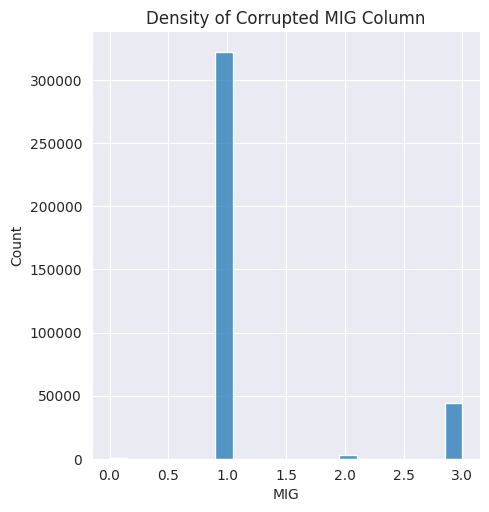

<Figure size 800x800 with 0 Axes>

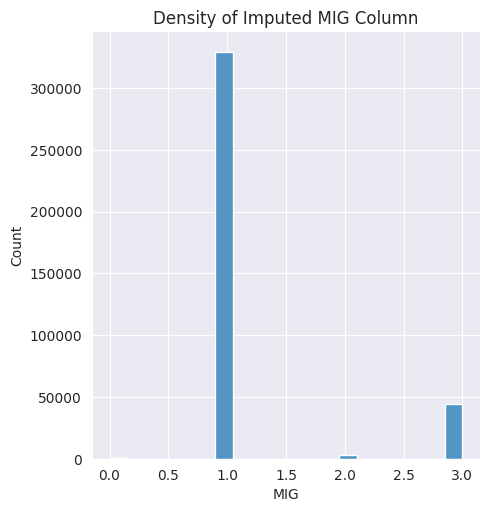

In [45]:
imputed_data_dict_MIG = impute_with_all_techniques(corrupted_data_MIG, target_column="MIG", column_type="categorical")

#### DREM Column





 ###############  Impute DREM column with impute-by-mode technique  ###############
Impute values:  {'DREM': 2.0}
Number of nulls in DREM column in the corrupted dataframe:  17644
Number of nulls in DREM column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

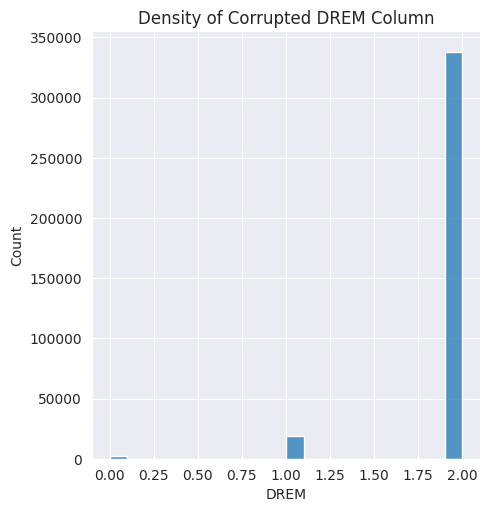

<Figure size 800x800 with 0 Axes>

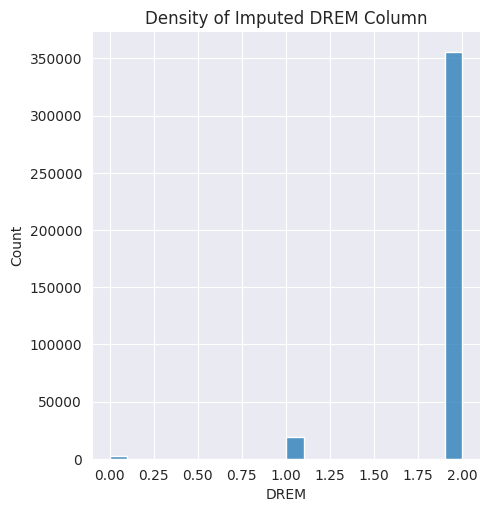





 ###############  Impute DREM column with impute-by-mode-trimmed technique  ###############
Impute values:  {'DREM': 2.0}
Number of nulls in DREM column in the corrupted dataframe:  17644
Number of nulls in DREM column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

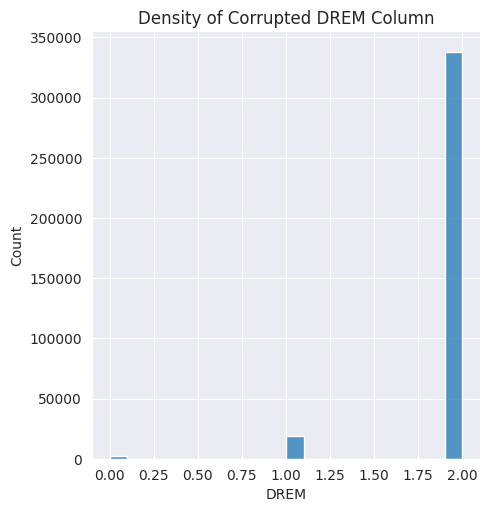

<Figure size 800x800 with 0 Axes>

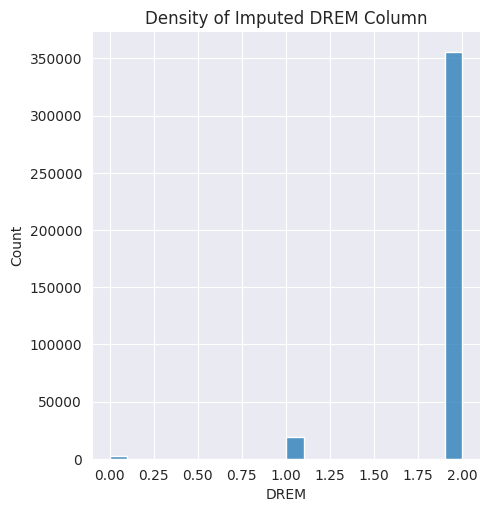

In [46]:
imputed_data_dict_DREM_not_appl = impute_with_all_techniques(corrupted_data_DREM_not_applic, target_column="DREM", column_type="categorical")

### Unknown

#### AGEP Column





 ###############  Impute AGEP column with impute-by-mean technique  ###############
Impute values:  {'AGEP': 40.18010274704869}
Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

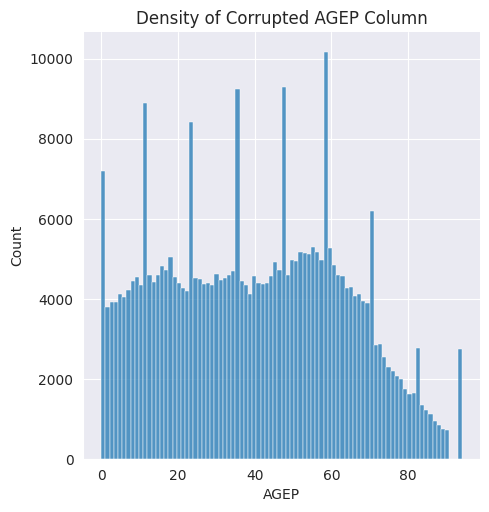

<Figure size 800x800 with 0 Axes>

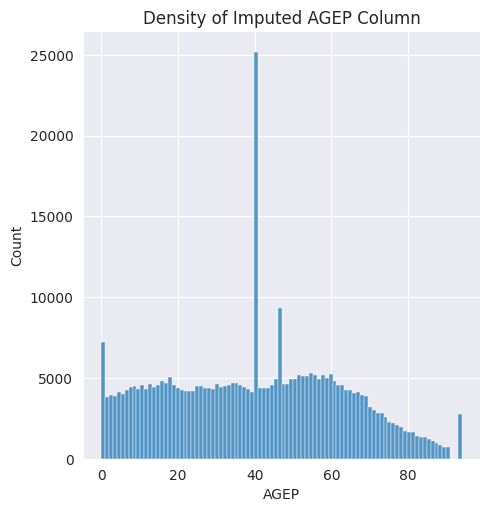





 ###############  Impute AGEP column with impute-by-mean-trimmed technique  ###############
Impute values:  {'AGEP': 39.73985229470723}
Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

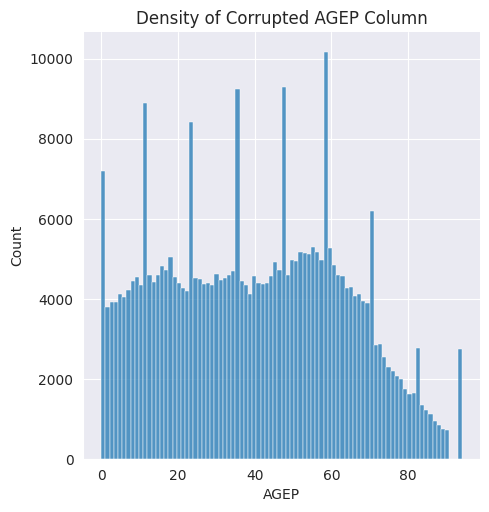

<Figure size 800x800 with 0 Axes>

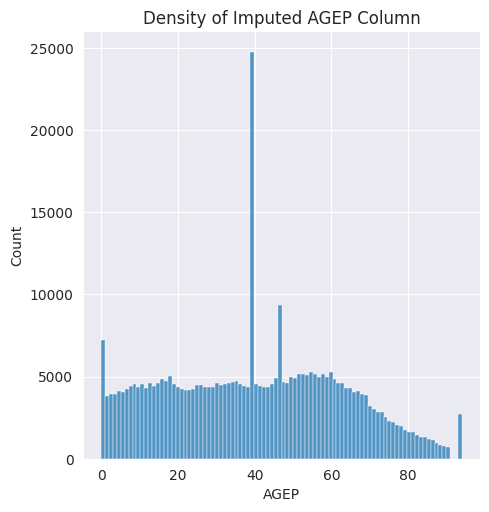





 ###############  Impute AGEP column with impute-by-median technique  ###############
Impute values:  {'AGEP': 40.0}
Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

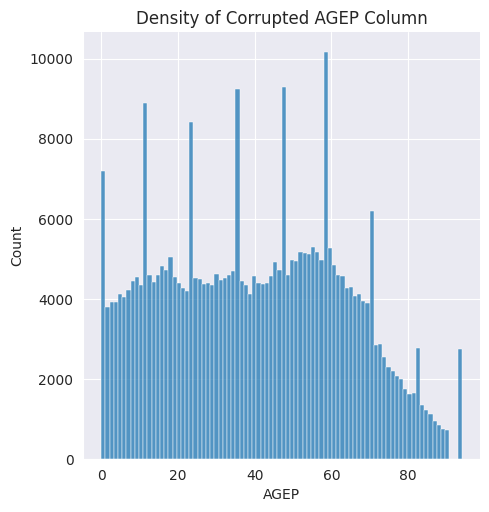

<Figure size 800x800 with 0 Axes>

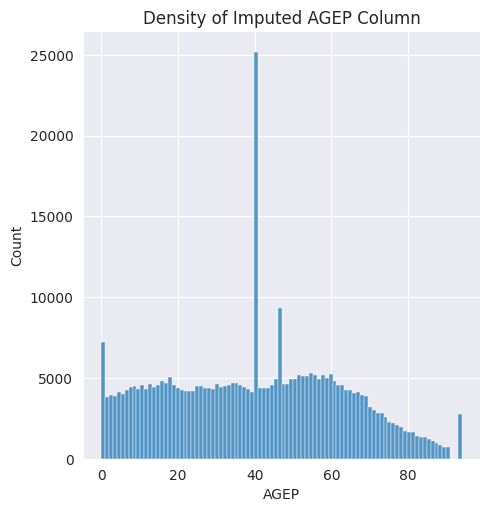





 ###############  Impute AGEP column with impute-by-median-trimmed technique  ###############
Impute values:  {'AGEP': 40.0}
Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

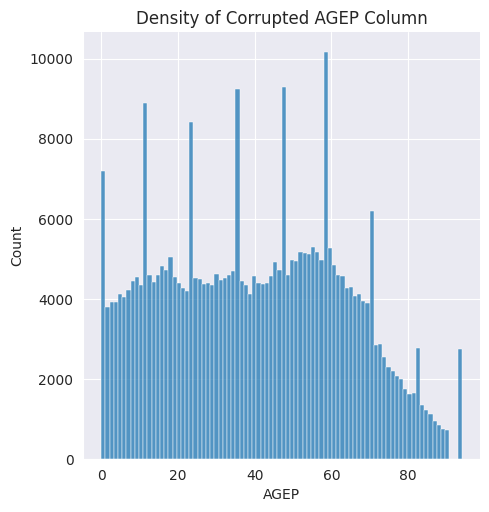

<Figure size 800x800 with 0 Axes>

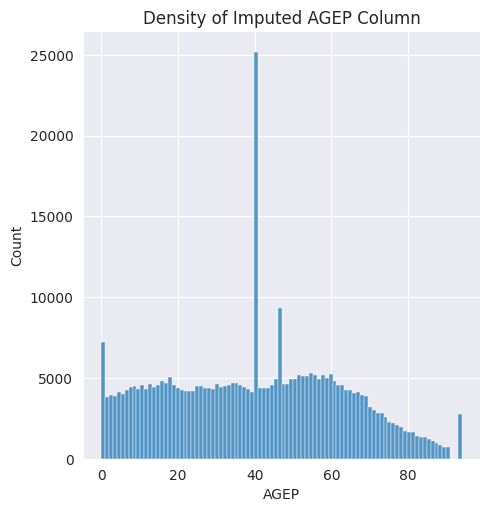

In [47]:
imputed_data_dict_AGEP = impute_with_all_techniques(corrupted_data_AGEP, target_column="AGEP", column_type="numerical")

#### NATIVITY Column





 ###############  Impute NATIVITY column with impute-by-mode technique  ###############
Impute values:  {'NATIVITY': 1.0}
Number of nulls in NATIVITY column in the corrupted dataframe:  12480
Number of nulls in NATIVITY column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

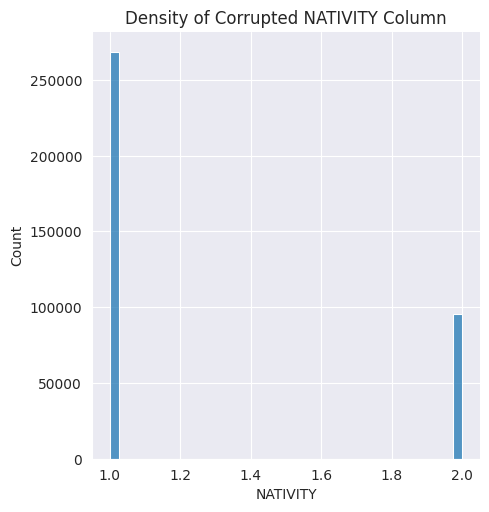

<Figure size 800x800 with 0 Axes>

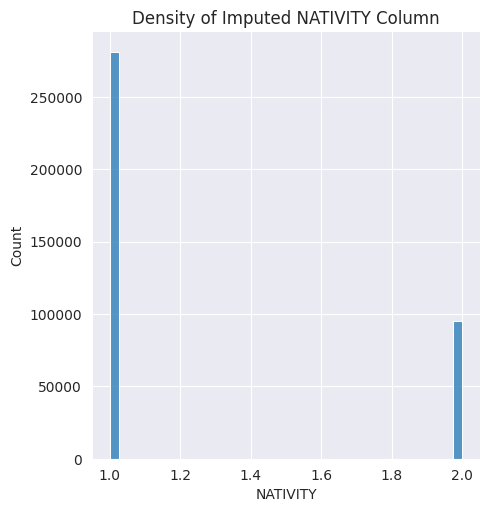





 ###############  Impute NATIVITY column with impute-by-mode-trimmed technique  ###############
Impute values:  {'NATIVITY': 1.0}
Number of nulls in NATIVITY column in the corrupted dataframe:  12480
Number of nulls in NATIVITY column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

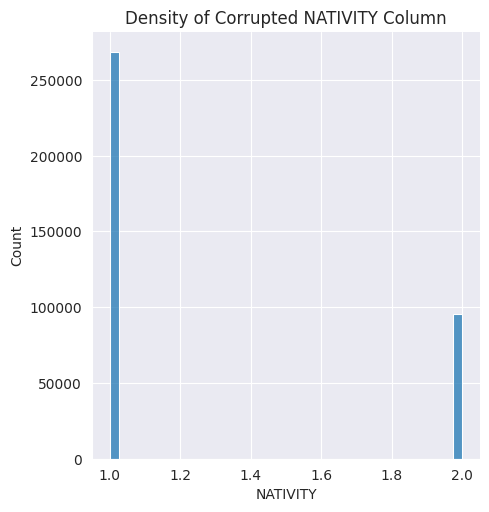

<Figure size 800x800 with 0 Axes>

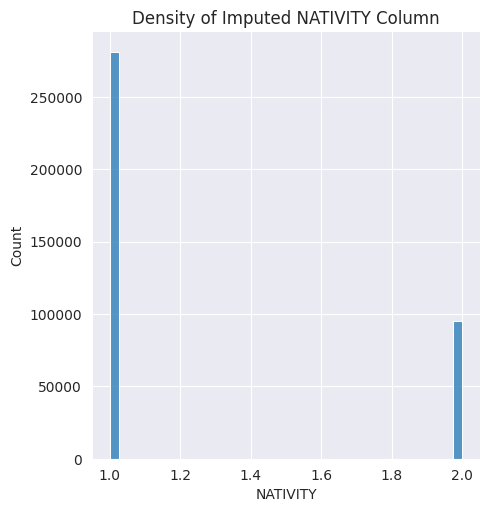

In [48]:
imputed_data_dict_NATIVITY = impute_with_all_techniques(corrupted_data_NATIVITY, target_column="NATIVITY", column_type="categorical")

### Avoided

#### DIS Column





 ###############  Impute DIS column with impute-by-mode technique  ###############
Impute values:  {'DIS': 2.0}
Number of nulls in DIS column in the corrupted dataframe:  43038
Number of nulls in DIS column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

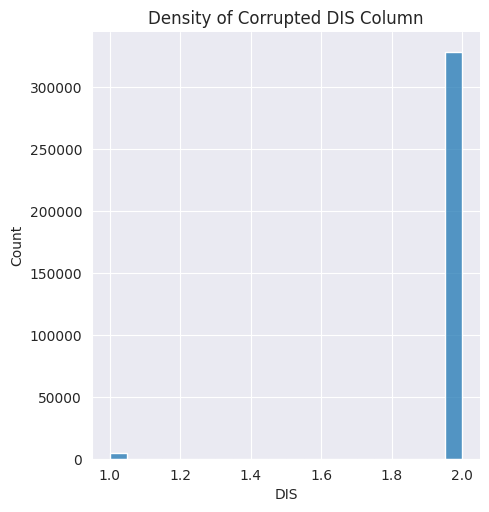

<Figure size 800x800 with 0 Axes>

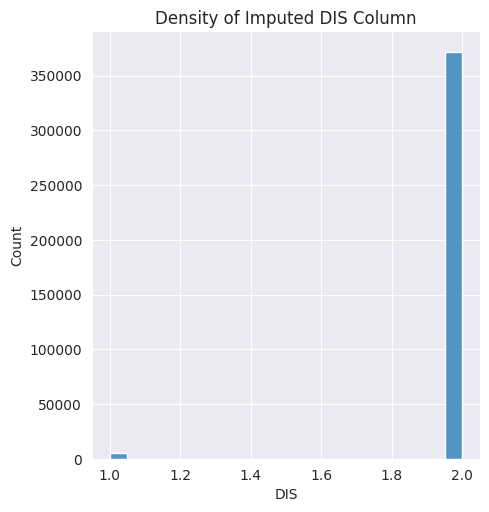





 ###############  Impute DIS column with impute-by-mode-trimmed technique  ###############
Impute values:  {'DIS': 2.0}
Number of nulls in DIS column in the corrupted dataframe:  43038
Number of nulls in DIS column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

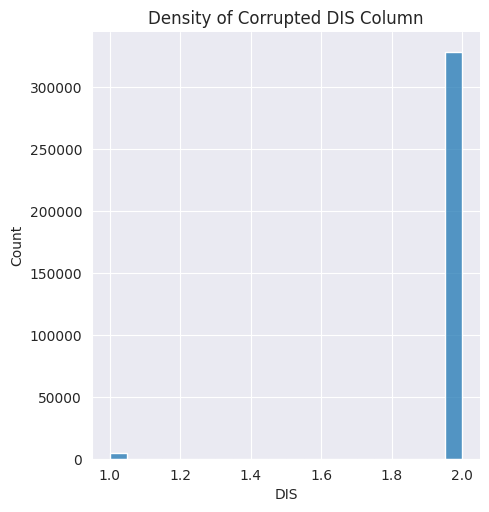

<Figure size 800x800 with 0 Axes>

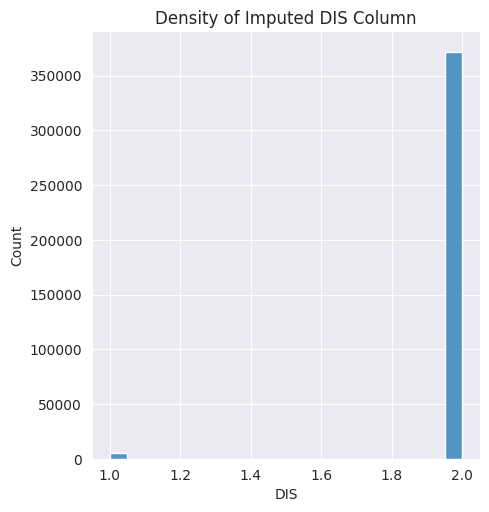

In [49]:
imputed_data_dict_DIS = impute_with_all_techniques(corrupted_data_DIS, target_column="DIS", column_type="categorical")

#### DEAR Column





 ###############  Impute DEAR column with impute-by-mode technique  ###############
Impute values:  {'DEAR': 2.0}
Number of nulls in DEAR column in the corrupted dataframe:  12060
Number of nulls in DEAR column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

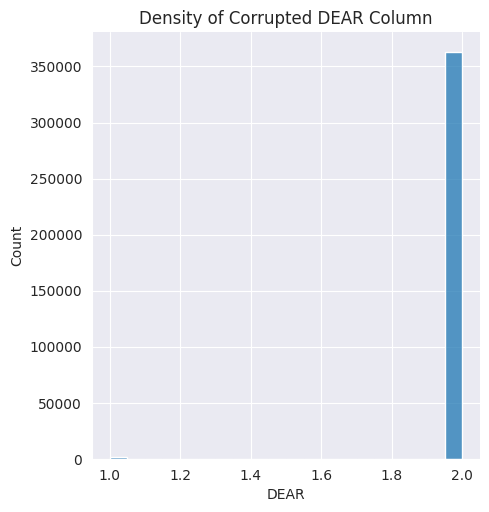

<Figure size 800x800 with 0 Axes>

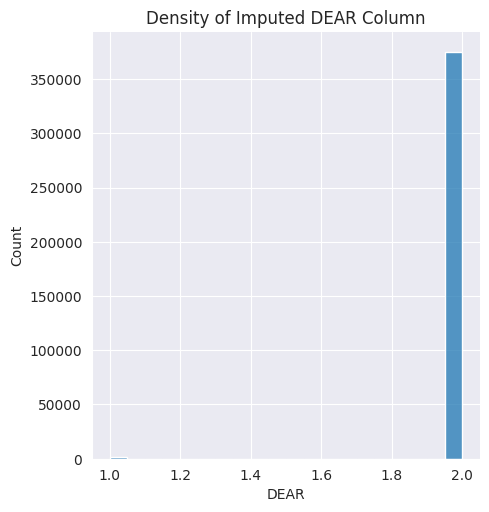





 ###############  Impute DEAR column with impute-by-mode-trimmed technique  ###############
Impute values:  {'DEAR': 2.0}
Number of nulls in DEAR column in the corrupted dataframe:  12060
Number of nulls in DEAR column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

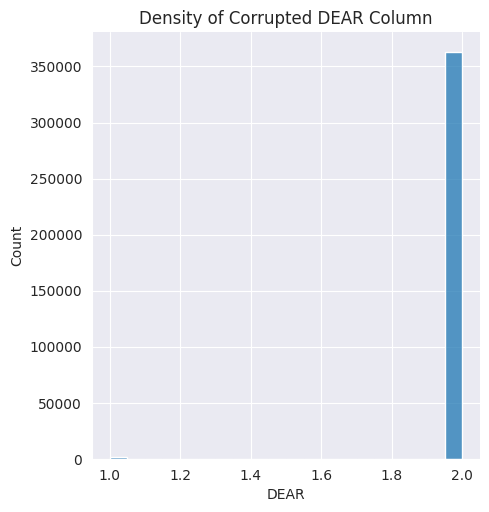

<Figure size 800x800 with 0 Axes>

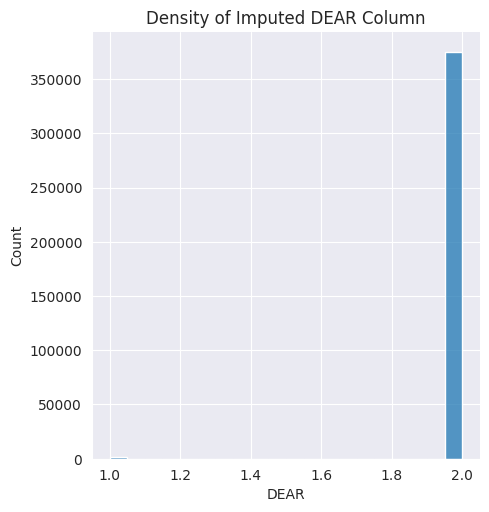

In [50]:
imputed_data_dict_DEAR = impute_with_all_techniques(corrupted_data_DEAR, target_column="DEAR", column_type="categorical")

#### DEYE Column





 ###############  Impute DEYE column with impute-by-mode technique  ###############
Impute values:  {'DEYE': 2.0}
Number of nulls in DEYE column in the corrupted dataframe:  7896
Number of nulls in DEYE column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

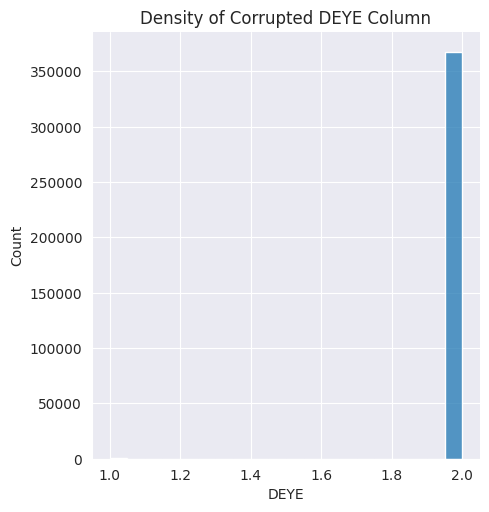

<Figure size 800x800 with 0 Axes>

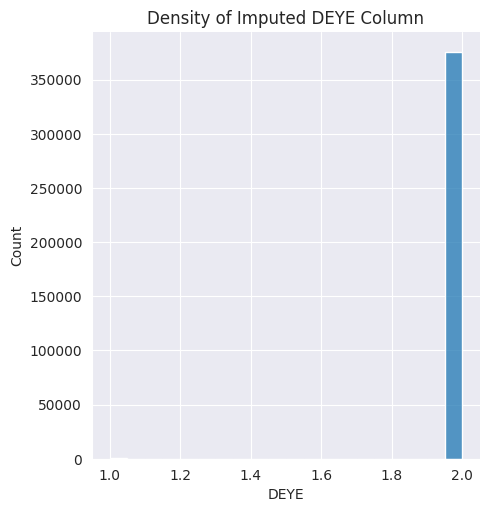





 ###############  Impute DEYE column with impute-by-mode-trimmed technique  ###############
Impute values:  {'DEYE': 2.0}
Number of nulls in DEYE column in the corrupted dataframe:  7896
Number of nulls in DEYE column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

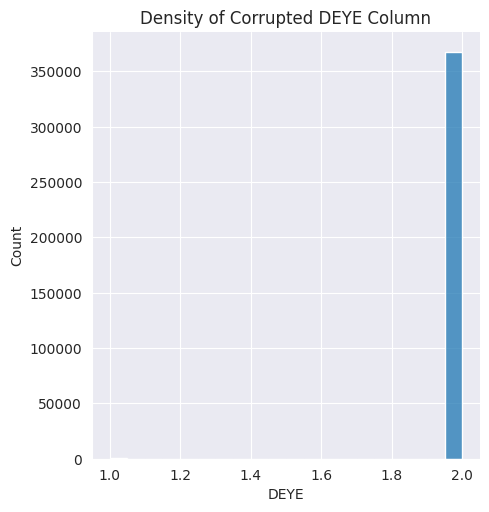

<Figure size 800x800 with 0 Axes>

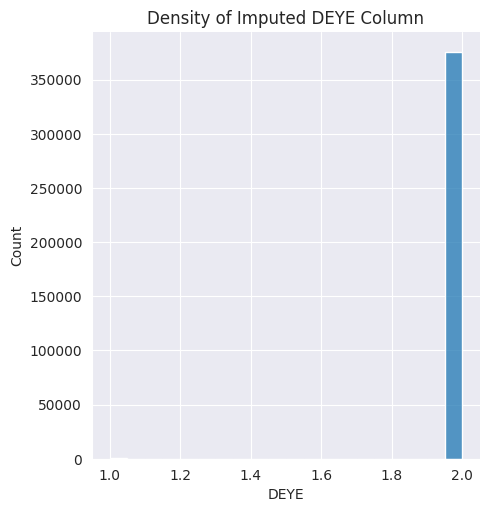

In [51]:
imputed_data_dict_DEYE = impute_with_all_techniques(corrupted_data_DEYE, target_column="DEYE", column_type="categorical")

#### DREM Column





 ###############  Impute DREM column with impute-by-mode technique  ###############
Impute values:  {'DREM': 2.0}
Number of nulls in DREM column in the corrupted dataframe:  16881
Number of nulls in DREM column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

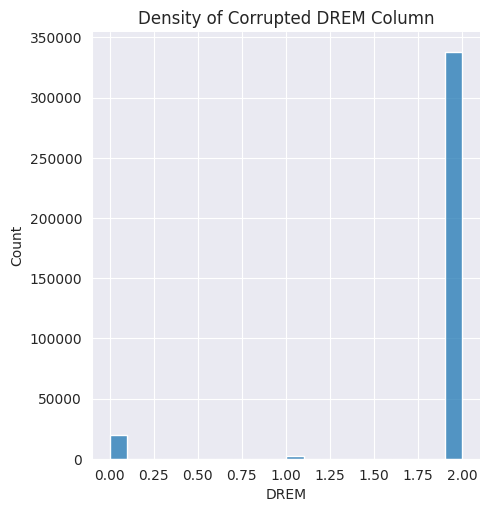

<Figure size 800x800 with 0 Axes>

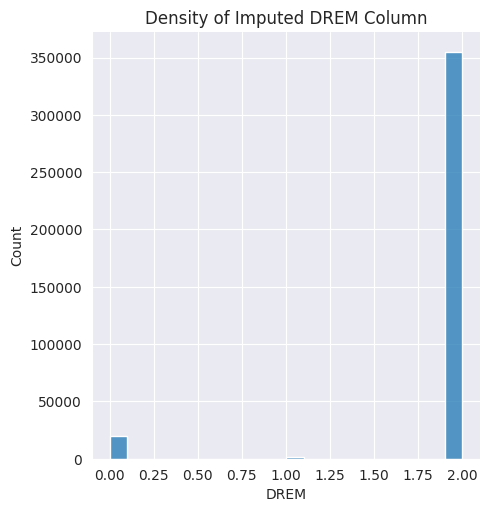





 ###############  Impute DREM column with impute-by-mode-trimmed technique  ###############
Impute values:  {'DREM': 2.0}
Number of nulls in DREM column in the corrupted dataframe:  16881
Number of nulls in DREM column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

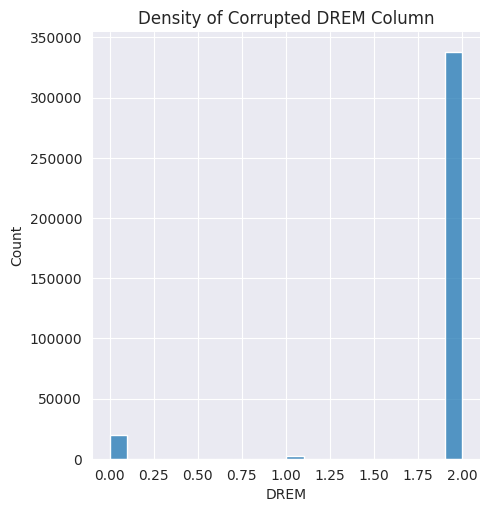

<Figure size 800x800 with 0 Axes>

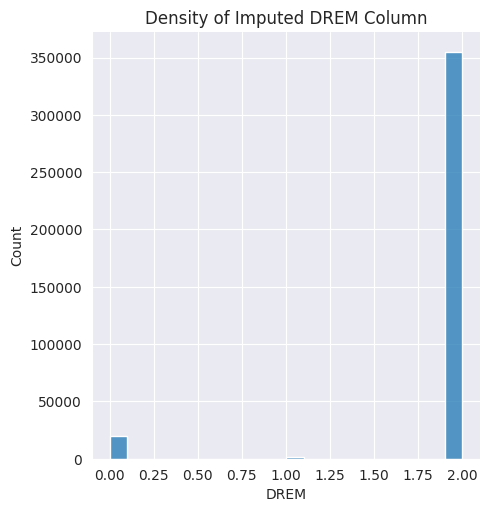

In [52]:
imputed_data_dict_DREM_avoided = impute_with_all_techniques(corrupted_data_DREM_avoided, target_column="DREM", column_type="categorical")

### Special





 ###############  Impute SEX column with impute-by-mode technique  ###############
Impute values:  {'SEX': 2.0}
Number of nulls in SEX column in the corrupted dataframe:  20416
Number of nulls in SEX column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

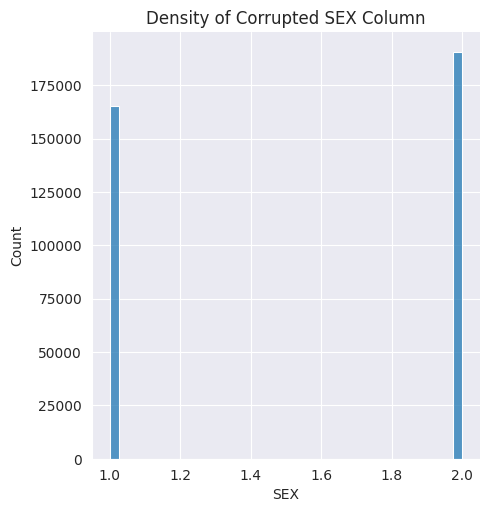

<Figure size 800x800 with 0 Axes>

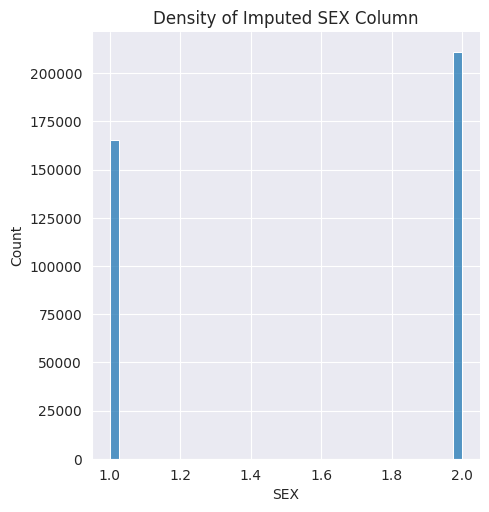





 ###############  Impute SEX column with impute-by-mode-trimmed technique  ###############
Impute values:  {'SEX': 2.0}
Number of nulls in SEX column in the corrupted dataframe:  20416
Number of nulls in SEX column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

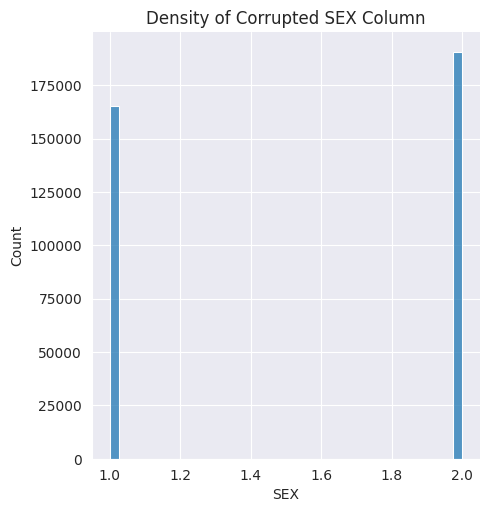

<Figure size 800x800 with 0 Axes>

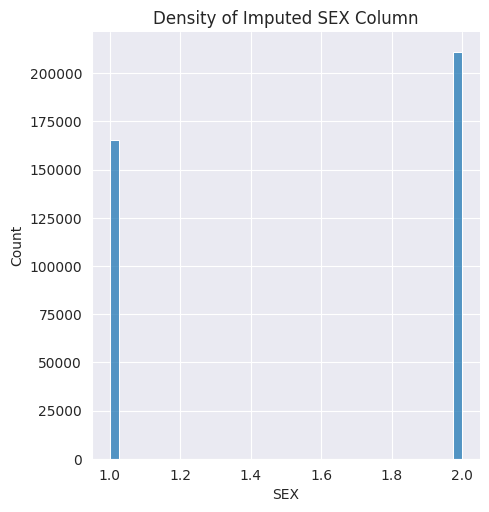

In [53]:
imputed_data_dict_SEX = impute_with_all_techniques(corrupted_data_SEX, target_column="SEX", column_type="categorical")





 ###############  Impute RAC1P column with impute-by-mode technique  ###############
Impute values:  {'RAC1P': 1.0}
Number of nulls in RAC1P column in the corrupted dataframe:  16180
Number of nulls in RAC1P column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

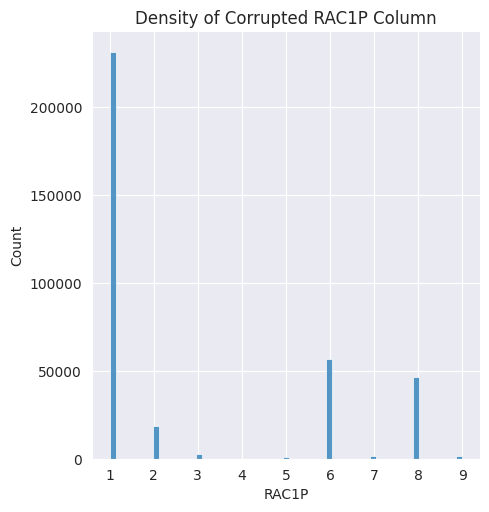

<Figure size 800x800 with 0 Axes>

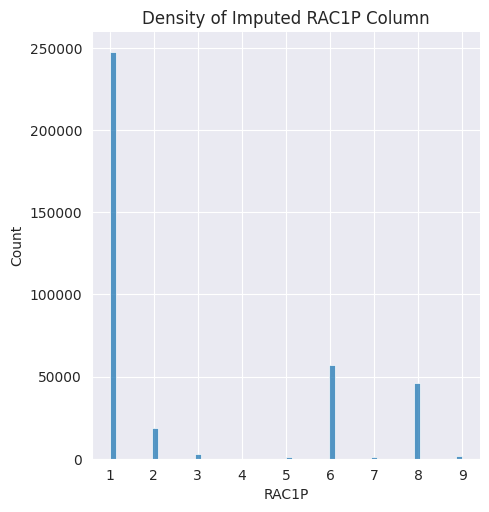





 ###############  Impute RAC1P column with impute-by-mode-trimmed technique  ###############
Impute values:  {'RAC1P': 1.0}
Number of nulls in RAC1P column in the corrupted dataframe:  16180
Number of nulls in RAC1P column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

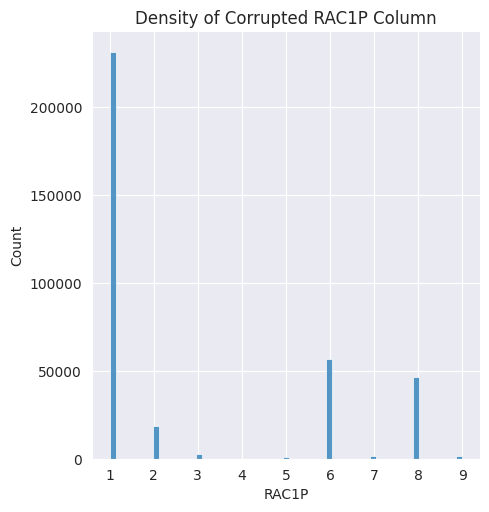

<Figure size 800x800 with 0 Axes>

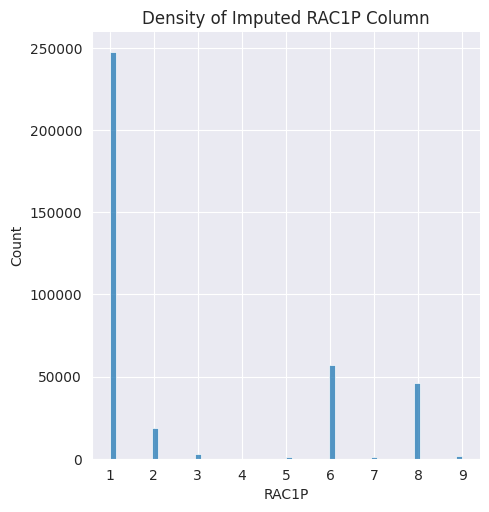

In [54]:
imputed_data_dict_RAC1P = impute_with_all_techniques(corrupted_data_RAC1P, target_column="RAC1P", column_type="categorical")

### Check Prediction Technique

Number of nulls in MAR column in the corrupted dataframe:  47040
Number of nulls in MAR column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

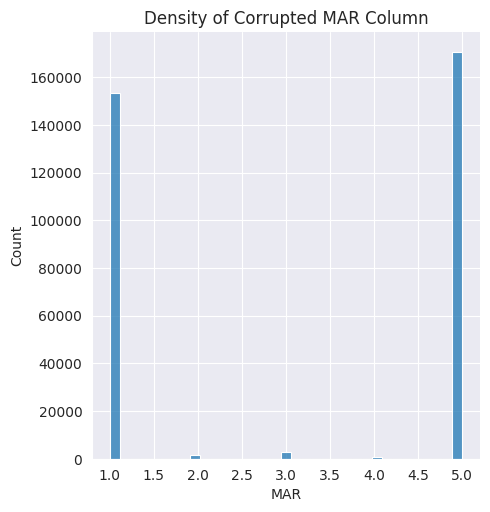

<Figure size 800x800 with 0 Axes>

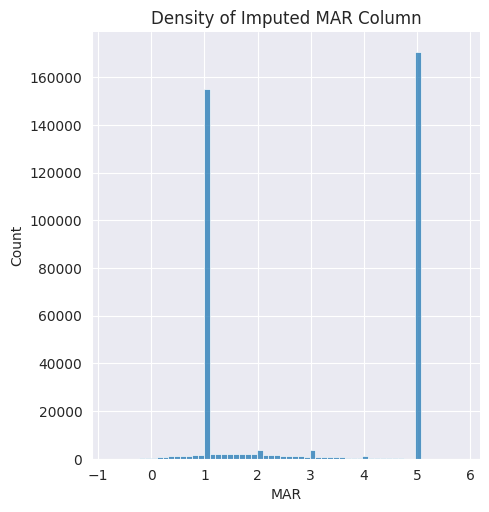

In [55]:
how_to = "predict-by-sklearn"
predicted_data_MAR = handle_df_nulls(corrupted_data_MAR, how_to, column_names=['MAR'])
imputed_nulls_analysis(predicted_data_MAR, corrupted_data_MAR, target_col="MAR")

Number of nulls in AGEP column in the corrupted dataframe:  20599
Number of nulls in AGEP column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

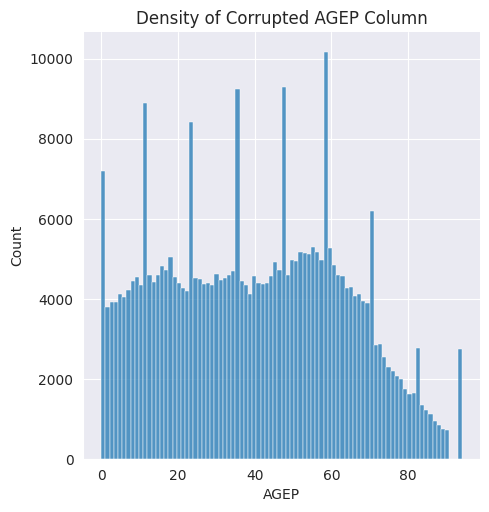

<Figure size 800x800 with 0 Axes>

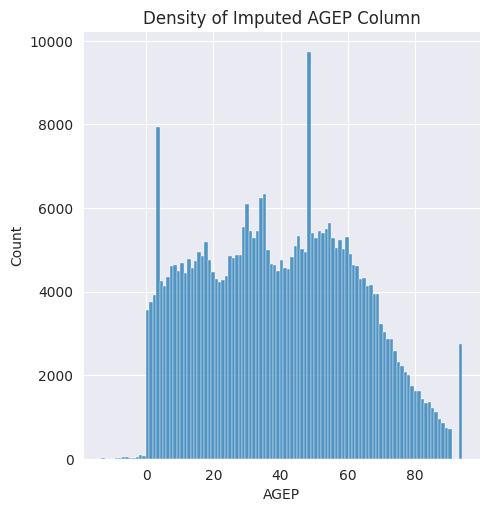

In [56]:
how_to = "predict-by-sklearn"
predicted_data_AGEP = handle_df_nulls(corrupted_data_AGEP, how_to, column_names=['AGEP'])
imputed_nulls_analysis(predicted_data_AGEP, corrupted_data_AGEP, target_col="AGEP")

Number of nulls in MIG column in the corrupted dataframe:  6776
Number of nulls in MIG column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

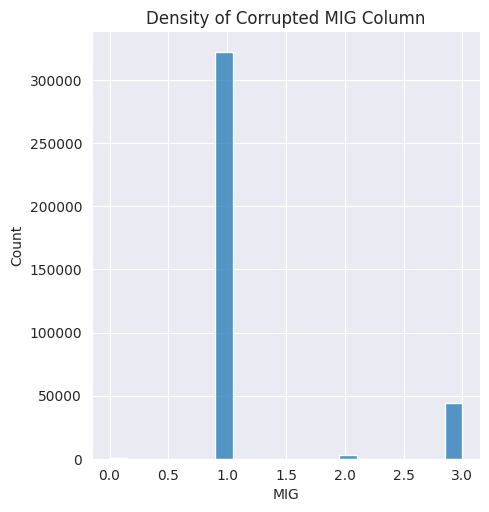

<Figure size 800x800 with 0 Axes>

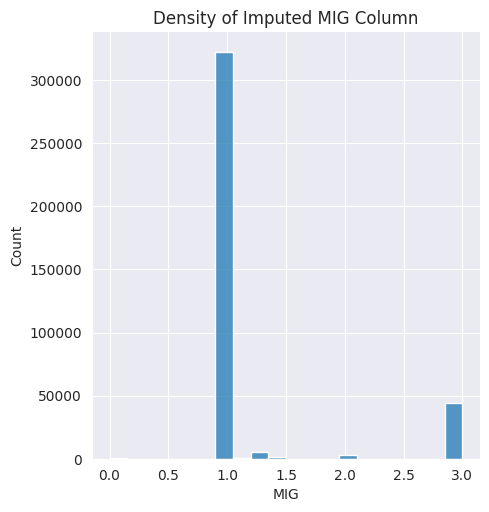

In [57]:
how_to = "predict-by-sklearn"
predicted_data_MIG = handle_df_nulls(corrupted_data_MIG, how_to, column_names=['MIG'])
imputed_nulls_analysis(predicted_data_MIG, corrupted_data_MIG, target_col="MIG")

### Check Drop Techniques

Number of nulls in MIG column in the corrupted dataframe:  6776
Number of nulls in MIG column in the imputed dataframe:  0


<Figure size 800x800 with 0 Axes>

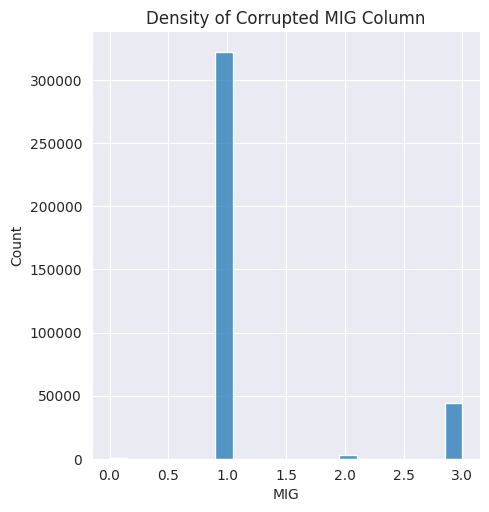

<Figure size 800x800 with 0 Axes>

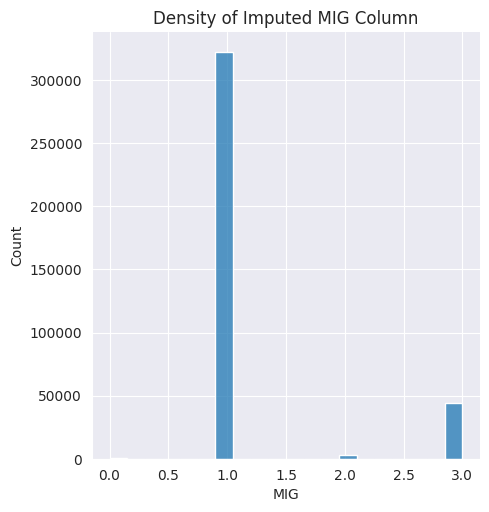

In [66]:
# Check drop-rows
how_to = "drop-rows"
imputed_data_drop_rows = handle_df_nulls(corrupted_data_MIG, how_to, column_names=['MIG'])
imputed_nulls_analysis(imputed_data_drop_rows, corrupted_data_MIG, target_col="MIG")

In [61]:
imputed_data_drop_rows['MIG'].describe()

count    369259.000000
mean          1.244701
std           0.651622
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: MIG, dtype: float64

In [62]:
corrupted_data_MIG['MIG'].describe()

count    369259.000000
mean          1.244701
std           0.651622
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: MIG, dtype: float64

In [65]:
print(corrupted_data_MIG.shape)
print(imputed_data_drop_rows.shape)

(376035, 16)
(369259, 16)


In [67]:
# Check drop-columns
how_to = "drop-column"
imputed_data_drop_cols = handle_df_nulls(corrupted_data_MIG, how_to, column_names=['MIG'])
imputed_data_drop_cols.columns

Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P'],
      dtype='object')